# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

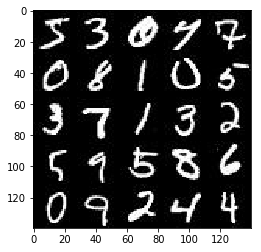

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

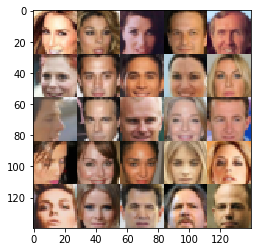

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\diogo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, 
                                (None, image_width, image_height, image_channels),
                                name='real_input')
    z_input = tf.placeholder(tf.float32,
                             (None,z_dim),
                             name='z_input')
    lr = tf.placeholder(tf.float32, name='lr')
    
    return real_input, z_input, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.1
        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'SAME')
        conv1 = tf.maximum(alpha*conv1, conv1)

        conv2 = tf.layers.conv2d(conv1, 128, 5, 2, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha*conv2, conv2)

        conv3 = tf.layers.conv2d(conv2, 256, 5, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha*conv3, conv3)

        fc   = tf.reshape(conv3, (-1, 4*4*256))
        fc = tf.layers.dense(fc, 1)

        out = tf.sigmoid(fc)
        
    return out, fc


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.1
        g1 = tf.layers.dense(z, 2*2*512)
        g1 = tf.reshape(g1, (-1, 2, 2, 512))
        g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = tf.maximum(alpha * g1, g1)

        g2 = tf.layers.conv2d_transpose(g1, 256, 5, 2, 'valid')
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(alpha * g2, g2)
    
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, 2, 'same')
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(alpha * g3, g3)
    
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    generator_model = generator(input_z, out_channel_dim)
    dis_model_real, dis_logits_real = discriminator(input_real)
    dis_model_fake, dis_logits_fake = discriminator(generator_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_model_real))
    )
    
    dis_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_model_fake))
    )
    
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_model_fake))
    )
    
    discriminator_loss = dis_loss_real + dis_loss_fake

    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    variables = tf.trainable_variables()
    d_vars = [v for v in variables if v.name.startswith('discriminator')]
    g_vars = [v for v in variables if v.name.startswith('generator')]

    # Run optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)

    return d_train, g_train    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    input_real, input_z, lr = model_inputs(img_width, img_height, img_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    step = 0
    print_every = 10
    show_every = 100
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                
                batch_images *= 2.0 # Rescale input to [-1, 1]
                
                batch_z = np.random.uniform(-1, 1, (batch_size, z_dim))

                _ = sess.run(d_opt, 
                             feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate}
                            )
                _ = sess.run(g_opt, 
                             feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate}
                            )
            
                if step % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch+1, epoch_count),
                          "Batch {}...".format(step),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if step % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 2.3937... Generator Loss: 0.1264
Epoch 1/2... Batch 20... Discriminator Loss: 5.0852... Generator Loss: 0.0071
Epoch 1/2... Batch 30... Discriminator Loss: 3.0686... Generator Loss: 0.0571
Epoch 1/2... Batch 40... Discriminator Loss: 1.6498... Generator Loss: 0.2560
Epoch 1/2... Batch 50... Discriminator Loss: 0.9228... Generator Loss: 0.6181
Epoch 1/2... Batch 60... Discriminator Loss: 0.3674... Generator Loss: 4.6930
Epoch 1/2... Batch 70... Discriminator Loss: 0.9334... Generator Loss: 5.6865
Epoch 1/2... Batch 80... Discriminator Loss: 1.0609... Generator Loss: 0.5603
Epoch 1/2... Batch 90... Discriminator Loss: 0.9201... Generator Loss: 0.6762
Epoch 1/2... Batch 100... Discriminator Loss: 0.6791... Generator Loss: 0.8905


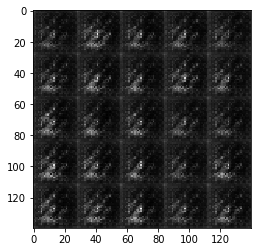

Epoch 1/2... Batch 110... Discriminator Loss: 0.5843... Generator Loss: 2.4750
Epoch 1/2... Batch 120... Discriminator Loss: 1.2275... Generator Loss: 3.2792
Epoch 1/2... Batch 130... Discriminator Loss: 0.6051... Generator Loss: 1.8649
Epoch 1/2... Batch 140... Discriminator Loss: 1.3635... Generator Loss: 1.1944
Epoch 1/2... Batch 150... Discriminator Loss: 0.7554... Generator Loss: 1.6111
Epoch 1/2... Batch 160... Discriminator Loss: 0.9195... Generator Loss: 2.3229
Epoch 1/2... Batch 170... Discriminator Loss: 0.9851... Generator Loss: 2.7066
Epoch 1/2... Batch 180... Discriminator Loss: 1.4281... Generator Loss: 0.4084
Epoch 1/2... Batch 190... Discriminator Loss: 1.7039... Generator Loss: 0.3020
Epoch 1/2... Batch 200... Discriminator Loss: 1.5074... Generator Loss: 0.3503


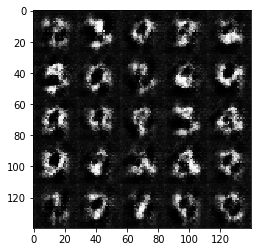

Epoch 1/2... Batch 210... Discriminator Loss: 1.4539... Generator Loss: 0.3969
Epoch 1/2... Batch 220... Discriminator Loss: 1.1566... Generator Loss: 0.5366
Epoch 1/2... Batch 230... Discriminator Loss: 1.2956... Generator Loss: 0.4227
Epoch 1/2... Batch 240... Discriminator Loss: 0.9539... Generator Loss: 0.8098
Epoch 1/2... Batch 250... Discriminator Loss: 1.5821... Generator Loss: 0.3037
Epoch 1/2... Batch 260... Discriminator Loss: 0.9210... Generator Loss: 0.8417
Epoch 1/2... Batch 270... Discriminator Loss: 1.3669... Generator Loss: 1.4291
Epoch 1/2... Batch 280... Discriminator Loss: 1.0538... Generator Loss: 1.6228
Epoch 1/2... Batch 290... Discriminator Loss: 1.0851... Generator Loss: 1.6774
Epoch 1/2... Batch 300... Discriminator Loss: 1.3050... Generator Loss: 0.4132


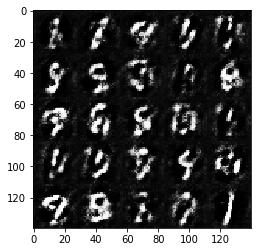

Epoch 1/2... Batch 310... Discriminator Loss: 0.8992... Generator Loss: 0.7386
Epoch 1/2... Batch 320... Discriminator Loss: 1.2299... Generator Loss: 0.5126
Epoch 1/2... Batch 330... Discriminator Loss: 1.3975... Generator Loss: 0.4002
Epoch 1/2... Batch 340... Discriminator Loss: 1.1275... Generator Loss: 0.5294
Epoch 1/2... Batch 350... Discriminator Loss: 0.9660... Generator Loss: 0.7943
Epoch 1/2... Batch 360... Discriminator Loss: 0.8478... Generator Loss: 0.9871
Epoch 1/2... Batch 370... Discriminator Loss: 1.4232... Generator Loss: 0.3592
Epoch 1/2... Batch 380... Discriminator Loss: 1.2345... Generator Loss: 0.4714
Epoch 1/2... Batch 390... Discriminator Loss: 0.8915... Generator Loss: 0.7675
Epoch 1/2... Batch 400... Discriminator Loss: 1.5327... Generator Loss: 0.2952


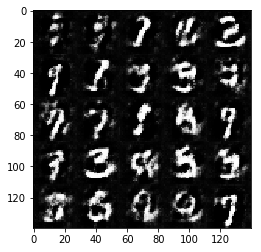

Epoch 1/2... Batch 410... Discriminator Loss: 1.2393... Generator Loss: 1.8728
Epoch 1/2... Batch 420... Discriminator Loss: 0.8764... Generator Loss: 1.8954
Epoch 1/2... Batch 430... Discriminator Loss: 0.9929... Generator Loss: 1.6605
Epoch 1/2... Batch 440... Discriminator Loss: 0.9185... Generator Loss: 0.9568
Epoch 1/2... Batch 450... Discriminator Loss: 0.8869... Generator Loss: 1.3088
Epoch 1/2... Batch 460... Discriminator Loss: 1.0119... Generator Loss: 0.9727
Epoch 1/2... Batch 470... Discriminator Loss: 1.2947... Generator Loss: 0.3833
Epoch 1/2... Batch 480... Discriminator Loss: 1.0943... Generator Loss: 0.5976
Epoch 1/2... Batch 490... Discriminator Loss: 1.8626... Generator Loss: 0.2078
Epoch 1/2... Batch 500... Discriminator Loss: 1.0323... Generator Loss: 0.5869


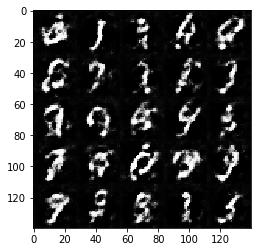

Epoch 1/2... Batch 510... Discriminator Loss: 1.2337... Generator Loss: 0.4626
Epoch 1/2... Batch 520... Discriminator Loss: 1.4777... Generator Loss: 0.3075
Epoch 1/2... Batch 530... Discriminator Loss: 1.0652... Generator Loss: 1.4728
Epoch 1/2... Batch 540... Discriminator Loss: 1.0614... Generator Loss: 1.3767
Epoch 1/2... Batch 550... Discriminator Loss: 0.9202... Generator Loss: 1.2209
Epoch 1/2... Batch 560... Discriminator Loss: 1.0746... Generator Loss: 1.8965
Epoch 1/2... Batch 570... Discriminator Loss: 0.9712... Generator Loss: 0.8321
Epoch 1/2... Batch 580... Discriminator Loss: 1.4738... Generator Loss: 0.3301
Epoch 1/2... Batch 590... Discriminator Loss: 1.0798... Generator Loss: 0.5597
Epoch 1/2... Batch 600... Discriminator Loss: 1.2087... Generator Loss: 1.5551


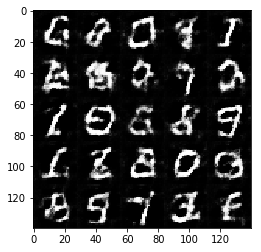

Epoch 1/2... Batch 610... Discriminator Loss: 0.9451... Generator Loss: 1.3335
Epoch 1/2... Batch 620... Discriminator Loss: 1.0252... Generator Loss: 1.2679
Epoch 1/2... Batch 630... Discriminator Loss: 0.9415... Generator Loss: 1.2501
Epoch 1/2... Batch 640... Discriminator Loss: 1.2498... Generator Loss: 0.4694
Epoch 1/2... Batch 650... Discriminator Loss: 1.4409... Generator Loss: 0.3646
Epoch 1/2... Batch 660... Discriminator Loss: 1.1341... Generator Loss: 0.6256
Epoch 1/2... Batch 670... Discriminator Loss: 1.3114... Generator Loss: 0.4563
Epoch 1/2... Batch 680... Discriminator Loss: 1.2763... Generator Loss: 2.0303
Epoch 1/2... Batch 690... Discriminator Loss: 1.4036... Generator Loss: 0.3699
Epoch 1/2... Batch 700... Discriminator Loss: 1.1512... Generator Loss: 0.5174


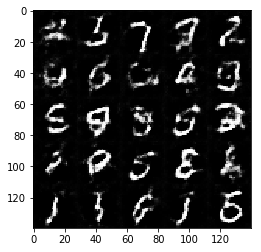

Epoch 1/2... Batch 710... Discriminator Loss: 1.5142... Generator Loss: 0.3066
Epoch 1/2... Batch 720... Discriminator Loss: 1.5197... Generator Loss: 0.3281
Epoch 1/2... Batch 730... Discriminator Loss: 0.9999... Generator Loss: 0.7039
Epoch 1/2... Batch 740... Discriminator Loss: 1.7290... Generator Loss: 0.2454
Epoch 1/2... Batch 750... Discriminator Loss: 1.3451... Generator Loss: 0.3862
Epoch 1/2... Batch 760... Discriminator Loss: 0.7432... Generator Loss: 1.0591
Epoch 1/2... Batch 770... Discriminator Loss: 0.9157... Generator Loss: 1.5049
Epoch 1/2... Batch 780... Discriminator Loss: 1.0094... Generator Loss: 0.8582
Epoch 1/2... Batch 790... Discriminator Loss: 1.0807... Generator Loss: 0.7454
Epoch 1/2... Batch 800... Discriminator Loss: 1.2131... Generator Loss: 1.3079


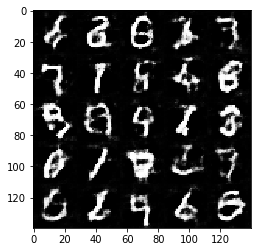

Epoch 1/2... Batch 810... Discriminator Loss: 0.8818... Generator Loss: 1.0560
Epoch 1/2... Batch 820... Discriminator Loss: 1.4798... Generator Loss: 0.3231
Epoch 1/2... Batch 830... Discriminator Loss: 1.5988... Generator Loss: 0.3099
Epoch 1/2... Batch 840... Discriminator Loss: 0.8951... Generator Loss: 0.9544
Epoch 1/2... Batch 850... Discriminator Loss: 0.8917... Generator Loss: 0.9754
Epoch 1/2... Batch 860... Discriminator Loss: 0.9576... Generator Loss: 1.2432
Epoch 1/2... Batch 870... Discriminator Loss: 1.2886... Generator Loss: 0.4233
Epoch 1/2... Batch 880... Discriminator Loss: 1.5517... Generator Loss: 0.3006
Epoch 1/2... Batch 890... Discriminator Loss: 1.0258... Generator Loss: 0.8150
Epoch 1/2... Batch 900... Discriminator Loss: 0.9562... Generator Loss: 0.8891


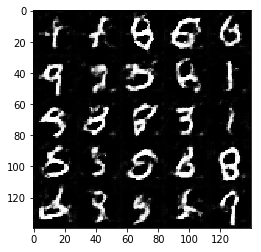

Epoch 1/2... Batch 910... Discriminator Loss: 0.9626... Generator Loss: 1.8835
Epoch 1/2... Batch 920... Discriminator Loss: 1.1061... Generator Loss: 0.7621
Epoch 1/2... Batch 930... Discriminator Loss: 1.4987... Generator Loss: 0.3492
Epoch 1/2... Batch 940... Discriminator Loss: 1.0619... Generator Loss: 0.6869
Epoch 1/2... Batch 950... Discriminator Loss: 0.8098... Generator Loss: 1.4637
Epoch 1/2... Batch 960... Discriminator Loss: 1.3971... Generator Loss: 1.8989
Epoch 1/2... Batch 970... Discriminator Loss: 1.1845... Generator Loss: 0.5091
Epoch 1/2... Batch 980... Discriminator Loss: 0.8709... Generator Loss: 1.4068
Epoch 1/2... Batch 990... Discriminator Loss: 1.0074... Generator Loss: 1.1104
Epoch 1/2... Batch 1000... Discriminator Loss: 1.2229... Generator Loss: 0.4512


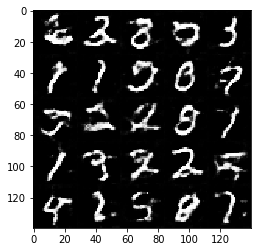

Epoch 1/2... Batch 1010... Discriminator Loss: 0.8413... Generator Loss: 0.9431
Epoch 1/2... Batch 1020... Discriminator Loss: 1.9886... Generator Loss: 0.2050
Epoch 1/2... Batch 1030... Discriminator Loss: 1.3891... Generator Loss: 0.3618
Epoch 1/2... Batch 1040... Discriminator Loss: 1.0134... Generator Loss: 0.7062
Epoch 1/2... Batch 1050... Discriminator Loss: 1.0821... Generator Loss: 1.9731
Epoch 1/2... Batch 1060... Discriminator Loss: 1.0796... Generator Loss: 1.2892
Epoch 1/2... Batch 1070... Discriminator Loss: 1.1422... Generator Loss: 0.5626
Epoch 1/2... Batch 1080... Discriminator Loss: 1.1183... Generator Loss: 0.5065
Epoch 1/2... Batch 1090... Discriminator Loss: 1.1421... Generator Loss: 0.4678
Epoch 1/2... Batch 1100... Discriminator Loss: 1.6378... Generator Loss: 0.2537


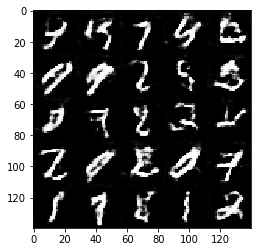

Epoch 1/2... Batch 1110... Discriminator Loss: 0.9020... Generator Loss: 1.1990
Epoch 1/2... Batch 1120... Discriminator Loss: 1.3608... Generator Loss: 1.6685
Epoch 1/2... Batch 1130... Discriminator Loss: 0.9992... Generator Loss: 0.6965
Epoch 1/2... Batch 1140... Discriminator Loss: 1.1503... Generator Loss: 0.8215
Epoch 1/2... Batch 1150... Discriminator Loss: 1.0042... Generator Loss: 0.8702
Epoch 1/2... Batch 1160... Discriminator Loss: 1.2937... Generator Loss: 0.4179
Epoch 1/2... Batch 1170... Discriminator Loss: 0.8820... Generator Loss: 1.2719
Epoch 1/2... Batch 1180... Discriminator Loss: 1.4109... Generator Loss: 0.3523
Epoch 1/2... Batch 1190... Discriminator Loss: 0.8778... Generator Loss: 0.9032
Epoch 1/2... Batch 1200... Discriminator Loss: 1.1090... Generator Loss: 1.9545


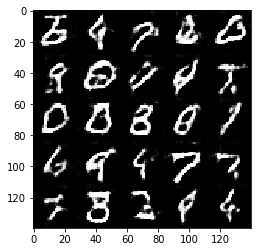

Epoch 1/2... Batch 1210... Discriminator Loss: 0.8829... Generator Loss: 1.1374
Epoch 1/2... Batch 1220... Discriminator Loss: 1.7062... Generator Loss: 1.6832
Epoch 1/2... Batch 1230... Discriminator Loss: 1.0068... Generator Loss: 0.6206
Epoch 1/2... Batch 1240... Discriminator Loss: 1.1435... Generator Loss: 0.5213
Epoch 1/2... Batch 1250... Discriminator Loss: 0.9721... Generator Loss: 0.6371
Epoch 1/2... Batch 1260... Discriminator Loss: 0.7516... Generator Loss: 1.1210
Epoch 1/2... Batch 1270... Discriminator Loss: 1.1637... Generator Loss: 0.5257
Epoch 1/2... Batch 1280... Discriminator Loss: 0.8374... Generator Loss: 0.7834
Epoch 1/2... Batch 1290... Discriminator Loss: 0.8033... Generator Loss: 1.0963
Epoch 1/2... Batch 1300... Discriminator Loss: 1.2531... Generator Loss: 1.7764


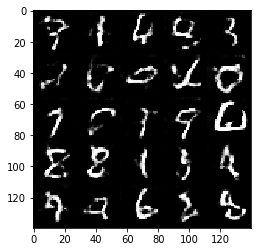

Epoch 1/2... Batch 1310... Discriminator Loss: 0.6676... Generator Loss: 1.1638
Epoch 1/2... Batch 1320... Discriminator Loss: 1.0633... Generator Loss: 0.5891
Epoch 1/2... Batch 1330... Discriminator Loss: 1.2801... Generator Loss: 0.4083
Epoch 1/2... Batch 1340... Discriminator Loss: 0.7889... Generator Loss: 0.9527
Epoch 1/2... Batch 1350... Discriminator Loss: 1.4213... Generator Loss: 3.1925
Epoch 1/2... Batch 1360... Discriminator Loss: 1.0753... Generator Loss: 0.6927
Epoch 1/2... Batch 1370... Discriminator Loss: 0.9614... Generator Loss: 0.7382
Epoch 1/2... Batch 1380... Discriminator Loss: 0.8614... Generator Loss: 0.8477
Epoch 1/2... Batch 1390... Discriminator Loss: 0.6629... Generator Loss: 1.4072
Epoch 1/2... Batch 1400... Discriminator Loss: 1.0982... Generator Loss: 0.6049


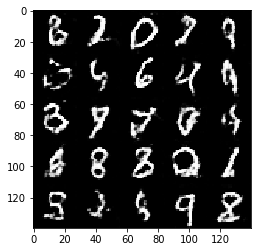

Epoch 1/2... Batch 1410... Discriminator Loss: 0.9055... Generator Loss: 0.8243
Epoch 1/2... Batch 1420... Discriminator Loss: 1.3342... Generator Loss: 0.4789
Epoch 1/2... Batch 1430... Discriminator Loss: 0.8817... Generator Loss: 1.1899
Epoch 1/2... Batch 1440... Discriminator Loss: 1.0641... Generator Loss: 0.5984
Epoch 1/2... Batch 1450... Discriminator Loss: 0.7363... Generator Loss: 1.2914
Epoch 1/2... Batch 1460... Discriminator Loss: 0.9563... Generator Loss: 0.6205
Epoch 1/2... Batch 1470... Discriminator Loss: 1.4284... Generator Loss: 0.3698
Epoch 1/2... Batch 1480... Discriminator Loss: 0.8283... Generator Loss: 0.7665
Epoch 1/2... Batch 1490... Discriminator Loss: 1.2491... Generator Loss: 0.4371
Epoch 1/2... Batch 1500... Discriminator Loss: 1.5312... Generator Loss: 0.3231


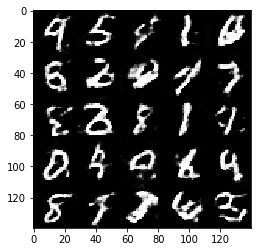

Epoch 1/2... Batch 1510... Discriminator Loss: 0.9947... Generator Loss: 0.6282
Epoch 1/2... Batch 1520... Discriminator Loss: 0.6877... Generator Loss: 0.9852
Epoch 1/2... Batch 1530... Discriminator Loss: 2.3390... Generator Loss: 0.1425
Epoch 1/2... Batch 1540... Discriminator Loss: 0.8592... Generator Loss: 0.8515
Epoch 1/2... Batch 1550... Discriminator Loss: 0.8366... Generator Loss: 0.9135
Epoch 1/2... Batch 1560... Discriminator Loss: 0.7275... Generator Loss: 1.2325
Epoch 1/2... Batch 1570... Discriminator Loss: 0.6750... Generator Loss: 1.2225
Epoch 1/2... Batch 1580... Discriminator Loss: 0.7949... Generator Loss: 1.4036
Epoch 1/2... Batch 1590... Discriminator Loss: 0.8407... Generator Loss: 0.7524
Epoch 1/2... Batch 1600... Discriminator Loss: 0.9221... Generator Loss: 0.6782


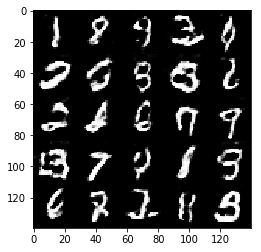

Epoch 1/2... Batch 1610... Discriminator Loss: 1.0969... Generator Loss: 0.5587
Epoch 1/2... Batch 1620... Discriminator Loss: 1.0045... Generator Loss: 0.7180
Epoch 1/2... Batch 1630... Discriminator Loss: 0.8504... Generator Loss: 0.8397
Epoch 1/2... Batch 1640... Discriminator Loss: 0.8577... Generator Loss: 0.7628
Epoch 1/2... Batch 1650... Discriminator Loss: 0.6122... Generator Loss: 1.0691
Epoch 1/2... Batch 1660... Discriminator Loss: 1.2790... Generator Loss: 0.4665
Epoch 1/2... Batch 1670... Discriminator Loss: 1.3269... Generator Loss: 0.3900
Epoch 1/2... Batch 1680... Discriminator Loss: 0.6258... Generator Loss: 1.1684
Epoch 1/2... Batch 1690... Discriminator Loss: 1.1953... Generator Loss: 0.4677
Epoch 1/2... Batch 1700... Discriminator Loss: 0.6898... Generator Loss: 1.0367


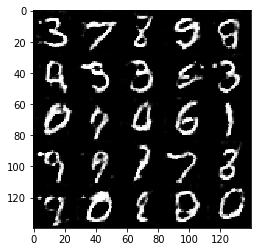

Epoch 1/2... Batch 1710... Discriminator Loss: 0.5211... Generator Loss: 1.3759
Epoch 1/2... Batch 1720... Discriminator Loss: 1.8417... Generator Loss: 0.2199
Epoch 1/2... Batch 1730... Discriminator Loss: 0.8607... Generator Loss: 1.0846
Epoch 1/2... Batch 1740... Discriminator Loss: 2.9704... Generator Loss: 3.5576
Epoch 1/2... Batch 1750... Discriminator Loss: 0.9419... Generator Loss: 0.8629
Epoch 1/2... Batch 1760... Discriminator Loss: 0.8437... Generator Loss: 0.7362
Epoch 1/2... Batch 1770... Discriminator Loss: 1.2190... Generator Loss: 0.5647
Epoch 1/2... Batch 1780... Discriminator Loss: 1.0557... Generator Loss: 0.6083
Epoch 1/2... Batch 1790... Discriminator Loss: 1.2587... Generator Loss: 0.4240
Epoch 1/2... Batch 1800... Discriminator Loss: 0.4854... Generator Loss: 1.4852


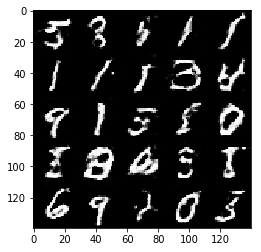

Epoch 1/2... Batch 1810... Discriminator Loss: 0.6900... Generator Loss: 1.6172
Epoch 1/2... Batch 1820... Discriminator Loss: 1.0478... Generator Loss: 0.6076
Epoch 1/2... Batch 1830... Discriminator Loss: 1.3502... Generator Loss: 0.3952
Epoch 1/2... Batch 1840... Discriminator Loss: 0.7163... Generator Loss: 1.0832
Epoch 1/2... Batch 1850... Discriminator Loss: 0.9124... Generator Loss: 0.9051
Epoch 1/2... Batch 1860... Discriminator Loss: 1.5501... Generator Loss: 0.2952
Epoch 1/2... Batch 1870... Discriminator Loss: 0.5366... Generator Loss: 1.1698
Epoch 2/2... Batch 1880... Discriminator Loss: 0.6719... Generator Loss: 1.0144
Epoch 2/2... Batch 1890... Discriminator Loss: 0.6340... Generator Loss: 1.3007
Epoch 2/2... Batch 1900... Discriminator Loss: 0.5834... Generator Loss: 1.1122


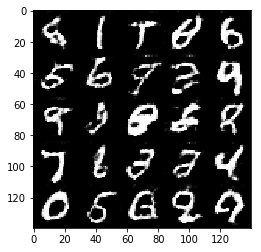

Epoch 2/2... Batch 1910... Discriminator Loss: 0.8774... Generator Loss: 0.7284
Epoch 2/2... Batch 1920... Discriminator Loss: 1.3876... Generator Loss: 0.4009
Epoch 2/2... Batch 1930... Discriminator Loss: 1.5842... Generator Loss: 0.2743
Epoch 2/2... Batch 1940... Discriminator Loss: 1.1151... Generator Loss: 0.5128
Epoch 2/2... Batch 1950... Discriminator Loss: 0.5770... Generator Loss: 2.0868
Epoch 2/2... Batch 1960... Discriminator Loss: 0.9086... Generator Loss: 0.7063
Epoch 2/2... Batch 1970... Discriminator Loss: 0.7319... Generator Loss: 1.6085
Epoch 2/2... Batch 1980... Discriminator Loss: 1.1545... Generator Loss: 3.3243
Epoch 2/2... Batch 1990... Discriminator Loss: 0.5941... Generator Loss: 1.2377
Epoch 2/2... Batch 2000... Discriminator Loss: 0.7794... Generator Loss: 2.3193


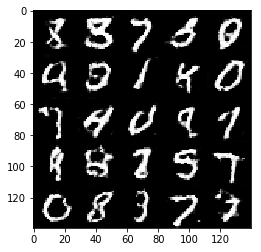

Epoch 2/2... Batch 2010... Discriminator Loss: 0.4804... Generator Loss: 1.3908
Epoch 2/2... Batch 2020... Discriminator Loss: 0.6430... Generator Loss: 1.0154
Epoch 2/2... Batch 2030... Discriminator Loss: 0.6851... Generator Loss: 0.9581
Epoch 2/2... Batch 2040... Discriminator Loss: 0.9510... Generator Loss: 0.6643
Epoch 2/2... Batch 2050... Discriminator Loss: 3.6275... Generator Loss: 4.5690
Epoch 2/2... Batch 2060... Discriminator Loss: 0.7076... Generator Loss: 1.0706
Epoch 2/2... Batch 2070... Discriminator Loss: 0.7339... Generator Loss: 0.9453
Epoch 2/2... Batch 2080... Discriminator Loss: 1.8920... Generator Loss: 0.2356
Epoch 2/2... Batch 2090... Discriminator Loss: 1.2649... Generator Loss: 0.4327
Epoch 2/2... Batch 2100... Discriminator Loss: 0.7632... Generator Loss: 0.9280


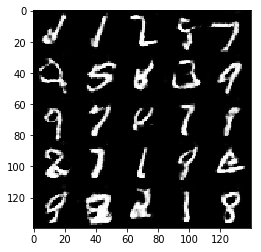

Epoch 2/2... Batch 2110... Discriminator Loss: 0.9969... Generator Loss: 0.5991
Epoch 2/2... Batch 2120... Discriminator Loss: 0.9381... Generator Loss: 0.7385
Epoch 2/2... Batch 2130... Discriminator Loss: 0.7389... Generator Loss: 0.9620
Epoch 2/2... Batch 2140... Discriminator Loss: 0.7944... Generator Loss: 0.8511
Epoch 2/2... Batch 2150... Discriminator Loss: 0.8256... Generator Loss: 0.9263
Epoch 2/2... Batch 2160... Discriminator Loss: 0.6298... Generator Loss: 1.4434
Epoch 2/2... Batch 2170... Discriminator Loss: 0.6757... Generator Loss: 1.1246
Epoch 2/2... Batch 2180... Discriminator Loss: 0.6871... Generator Loss: 1.3298
Epoch 2/2... Batch 2190... Discriminator Loss: 1.1119... Generator Loss: 0.5781
Epoch 2/2... Batch 2200... Discriminator Loss: 0.5064... Generator Loss: 1.4597


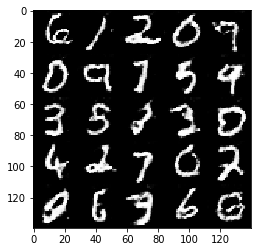

Epoch 2/2... Batch 2210... Discriminator Loss: 0.6010... Generator Loss: 2.0002
Epoch 2/2... Batch 2220... Discriminator Loss: 0.7134... Generator Loss: 2.4159
Epoch 2/2... Batch 2230... Discriminator Loss: 0.6296... Generator Loss: 1.0781
Epoch 2/2... Batch 2240... Discriminator Loss: 0.6841... Generator Loss: 1.1771
Epoch 2/2... Batch 2250... Discriminator Loss: 0.6553... Generator Loss: 0.9742
Epoch 2/2... Batch 2260... Discriminator Loss: 0.6779... Generator Loss: 0.9360
Epoch 2/2... Batch 2270... Discriminator Loss: 1.1558... Generator Loss: 0.5068
Epoch 2/2... Batch 2280... Discriminator Loss: 0.4345... Generator Loss: 1.5359
Epoch 2/2... Batch 2290... Discriminator Loss: 0.6850... Generator Loss: 1.5211
Epoch 2/2... Batch 2300... Discriminator Loss: 0.7545... Generator Loss: 0.8041


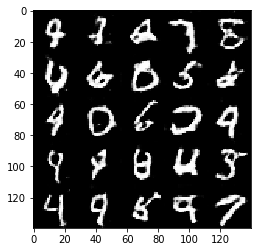

Epoch 2/2... Batch 2310... Discriminator Loss: 0.5612... Generator Loss: 1.5246
Epoch 2/2... Batch 2320... Discriminator Loss: 0.8224... Generator Loss: 1.6323
Epoch 2/2... Batch 2330... Discriminator Loss: 1.7940... Generator Loss: 0.2721
Epoch 2/2... Batch 2340... Discriminator Loss: 0.6952... Generator Loss: 1.5239
Epoch 2/2... Batch 2350... Discriminator Loss: 0.7126... Generator Loss: 0.9523
Epoch 2/2... Batch 2360... Discriminator Loss: 0.5489... Generator Loss: 1.1731
Epoch 2/2... Batch 2370... Discriminator Loss: 0.8682... Generator Loss: 0.7831
Epoch 2/2... Batch 2380... Discriminator Loss: 0.4968... Generator Loss: 2.1010
Epoch 2/2... Batch 2390... Discriminator Loss: 0.5474... Generator Loss: 1.2709
Epoch 2/2... Batch 2400... Discriminator Loss: 1.3032... Generator Loss: 0.4579


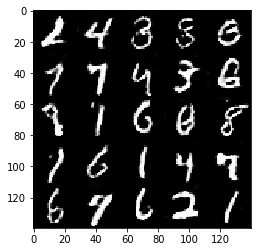

Epoch 2/2... Batch 2410... Discriminator Loss: 1.2432... Generator Loss: 0.5254
Epoch 2/2... Batch 2420... Discriminator Loss: 0.6234... Generator Loss: 1.2122
Epoch 2/2... Batch 2430... Discriminator Loss: 0.9076... Generator Loss: 0.6673
Epoch 2/2... Batch 2440... Discriminator Loss: 0.5216... Generator Loss: 1.8005
Epoch 2/2... Batch 2450... Discriminator Loss: 0.4474... Generator Loss: 1.6134
Epoch 2/2... Batch 2460... Discriminator Loss: 1.2108... Generator Loss: 0.4987
Epoch 2/2... Batch 2470... Discriminator Loss: 1.2072... Generator Loss: 0.5878
Epoch 2/2... Batch 2480... Discriminator Loss: 0.7149... Generator Loss: 0.9777
Epoch 2/2... Batch 2490... Discriminator Loss: 0.6374... Generator Loss: 1.0062
Epoch 2/2... Batch 2500... Discriminator Loss: 1.1856... Generator Loss: 0.5055


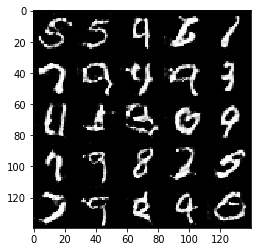

Epoch 2/2... Batch 2510... Discriminator Loss: 1.0170... Generator Loss: 0.5978
Epoch 2/2... Batch 2520... Discriminator Loss: 0.5428... Generator Loss: 1.1537
Epoch 2/2... Batch 2530... Discriminator Loss: 1.2268... Generator Loss: 0.4489
Epoch 2/2... Batch 2540... Discriminator Loss: 0.6158... Generator Loss: 1.1586
Epoch 2/2... Batch 2550... Discriminator Loss: 1.2772... Generator Loss: 0.4277
Epoch 2/2... Batch 2560... Discriminator Loss: 0.9494... Generator Loss: 0.6553
Epoch 2/2... Batch 2570... Discriminator Loss: 0.7018... Generator Loss: 3.1978
Epoch 2/2... Batch 2580... Discriminator Loss: 0.6505... Generator Loss: 1.0281
Epoch 2/2... Batch 2590... Discriminator Loss: 0.5227... Generator Loss: 1.5465
Epoch 2/2... Batch 2600... Discriminator Loss: 0.9749... Generator Loss: 0.6039


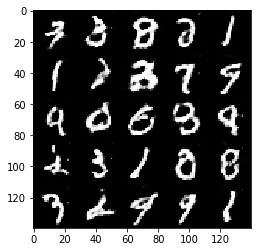

Epoch 2/2... Batch 2610... Discriminator Loss: 0.6853... Generator Loss: 0.9555
Epoch 2/2... Batch 2620... Discriminator Loss: 0.8010... Generator Loss: 0.8208
Epoch 2/2... Batch 2630... Discriminator Loss: 0.8440... Generator Loss: 0.7854
Epoch 2/2... Batch 2640... Discriminator Loss: 2.2471... Generator Loss: 0.1485
Epoch 2/2... Batch 2650... Discriminator Loss: 0.5930... Generator Loss: 1.2728
Epoch 2/2... Batch 2660... Discriminator Loss: 1.1090... Generator Loss: 4.2966
Epoch 2/2... Batch 2670... Discriminator Loss: 0.7210... Generator Loss: 1.1252
Epoch 2/2... Batch 2680... Discriminator Loss: 0.8012... Generator Loss: 0.9056
Epoch 2/2... Batch 2690... Discriminator Loss: 0.5825... Generator Loss: 1.1014
Epoch 2/2... Batch 2700... Discriminator Loss: 1.1747... Generator Loss: 0.5247


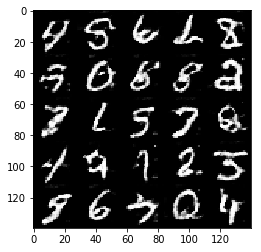

Epoch 2/2... Batch 2710... Discriminator Loss: 0.5903... Generator Loss: 2.2217
Epoch 2/2... Batch 2720... Discriminator Loss: 0.6713... Generator Loss: 0.9903
Epoch 2/2... Batch 2730... Discriminator Loss: 1.5208... Generator Loss: 0.3469
Epoch 2/2... Batch 2740... Discriminator Loss: 1.0279... Generator Loss: 0.6434
Epoch 2/2... Batch 2750... Discriminator Loss: 0.5944... Generator Loss: 1.0600
Epoch 2/2... Batch 2760... Discriminator Loss: 0.8994... Generator Loss: 0.6996
Epoch 2/2... Batch 2770... Discriminator Loss: 0.7577... Generator Loss: 0.8833
Epoch 2/2... Batch 2780... Discriminator Loss: 0.6201... Generator Loss: 0.9940
Epoch 2/2... Batch 2790... Discriminator Loss: 0.7055... Generator Loss: 0.9330
Epoch 2/2... Batch 2800... Discriminator Loss: 0.4784... Generator Loss: 2.4595


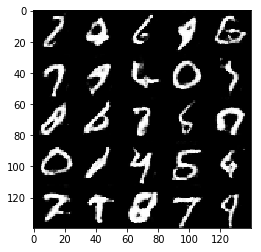

Epoch 2/2... Batch 2810... Discriminator Loss: 1.3875... Generator Loss: 0.4147
Epoch 2/2... Batch 2820... Discriminator Loss: 0.4683... Generator Loss: 1.3883
Epoch 2/2... Batch 2830... Discriminator Loss: 0.2757... Generator Loss: 2.0117
Epoch 2/2... Batch 2840... Discriminator Loss: 1.6552... Generator Loss: 0.3922
Epoch 2/2... Batch 2850... Discriminator Loss: 0.8924... Generator Loss: 0.6901
Epoch 2/2... Batch 2860... Discriminator Loss: 0.5576... Generator Loss: 1.3212
Epoch 2/2... Batch 2870... Discriminator Loss: 0.5216... Generator Loss: 1.1878
Epoch 2/2... Batch 2880... Discriminator Loss: 0.5316... Generator Loss: 1.1584
Epoch 2/2... Batch 2890... Discriminator Loss: 0.5472... Generator Loss: 1.3140
Epoch 2/2... Batch 2900... Discriminator Loss: 0.8743... Generator Loss: 0.7145


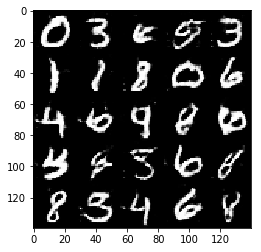

Epoch 2/2... Batch 2910... Discriminator Loss: 3.8550... Generator Loss: 6.3897
Epoch 2/2... Batch 2920... Discriminator Loss: 0.6424... Generator Loss: 1.0931
Epoch 2/2... Batch 2930... Discriminator Loss: 0.4966... Generator Loss: 1.2178
Epoch 2/2... Batch 2940... Discriminator Loss: 0.8631... Generator Loss: 0.7324
Epoch 2/2... Batch 2950... Discriminator Loss: 0.4917... Generator Loss: 1.2806
Epoch 2/2... Batch 2960... Discriminator Loss: 2.0378... Generator Loss: 0.1967
Epoch 2/2... Batch 2970... Discriminator Loss: 0.6545... Generator Loss: 1.0167
Epoch 2/2... Batch 2980... Discriminator Loss: 0.8345... Generator Loss: 0.7471
Epoch 2/2... Batch 2990... Discriminator Loss: 0.7075... Generator Loss: 0.9190
Epoch 2/2... Batch 3000... Discriminator Loss: 0.3427... Generator Loss: 1.9358


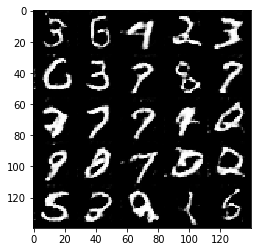

Epoch 2/2... Batch 3010... Discriminator Loss: 1.3290... Generator Loss: 3.7639
Epoch 2/2... Batch 3020... Discriminator Loss: 0.6390... Generator Loss: 1.1215
Epoch 2/2... Batch 3030... Discriminator Loss: 0.8131... Generator Loss: 0.7675
Epoch 2/2... Batch 3040... Discriminator Loss: 0.8794... Generator Loss: 0.7063
Epoch 2/2... Batch 3050... Discriminator Loss: 0.3816... Generator Loss: 1.5930
Epoch 2/2... Batch 3060... Discriminator Loss: 0.3470... Generator Loss: 1.7389
Epoch 2/2... Batch 3070... Discriminator Loss: 0.5088... Generator Loss: 1.2455
Epoch 2/2... Batch 3080... Discriminator Loss: 0.4557... Generator Loss: 1.2656
Epoch 2/2... Batch 3090... Discriminator Loss: 2.0622... Generator Loss: 0.2073
Epoch 2/2... Batch 3100... Discriminator Loss: 0.5287... Generator Loss: 1.1720


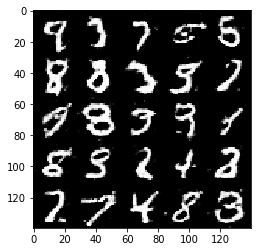

Epoch 2/2... Batch 3110... Discriminator Loss: 0.9662... Generator Loss: 0.6156
Epoch 2/2... Batch 3120... Discriminator Loss: 0.4406... Generator Loss: 1.2964
Epoch 2/2... Batch 3130... Discriminator Loss: 0.5765... Generator Loss: 2.6858
Epoch 2/2... Batch 3140... Discriminator Loss: 1.1452... Generator Loss: 0.4791
Epoch 2/2... Batch 3150... Discriminator Loss: 0.6794... Generator Loss: 0.9293
Epoch 2/2... Batch 3160... Discriminator Loss: 0.7135... Generator Loss: 0.8597
Epoch 2/2... Batch 3170... Discriminator Loss: 0.5003... Generator Loss: 1.4049
Epoch 2/2... Batch 3180... Discriminator Loss: 1.5117... Generator Loss: 0.3536
Epoch 2/2... Batch 3190... Discriminator Loss: 1.5128... Generator Loss: 0.4381
Epoch 2/2... Batch 3200... Discriminator Loss: 1.3559... Generator Loss: 0.4811


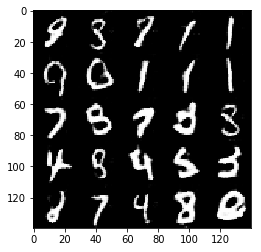

Epoch 2/2... Batch 3210... Discriminator Loss: 0.8338... Generator Loss: 0.8913
Epoch 2/2... Batch 3220... Discriminator Loss: 0.8270... Generator Loss: 0.7591
Epoch 2/2... Batch 3230... Discriminator Loss: 0.4469... Generator Loss: 1.3872
Epoch 2/2... Batch 3240... Discriminator Loss: 2.2901... Generator Loss: 4.6014
Epoch 2/2... Batch 3250... Discriminator Loss: 0.7103... Generator Loss: 0.9534
Epoch 2/2... Batch 3260... Discriminator Loss: 1.2313... Generator Loss: 0.6269
Epoch 2/2... Batch 3270... Discriminator Loss: 1.0279... Generator Loss: 0.5515
Epoch 2/2... Batch 3280... Discriminator Loss: 1.1575... Generator Loss: 3.6161
Epoch 2/2... Batch 3290... Discriminator Loss: 0.7797... Generator Loss: 0.8803
Epoch 2/2... Batch 3300... Discriminator Loss: 0.3724... Generator Loss: 1.7053


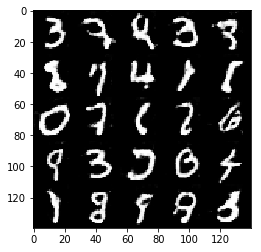

Epoch 2/2... Batch 3310... Discriminator Loss: 0.4156... Generator Loss: 1.4329
Epoch 2/2... Batch 3320... Discriminator Loss: 0.7222... Generator Loss: 0.9525
Epoch 2/2... Batch 3330... Discriminator Loss: 0.3987... Generator Loss: 1.4263
Epoch 2/2... Batch 3340... Discriminator Loss: 0.4338... Generator Loss: 1.4083
Epoch 2/2... Batch 3350... Discriminator Loss: 0.4644... Generator Loss: 1.4741
Epoch 2/2... Batch 3360... Discriminator Loss: 0.4515... Generator Loss: 1.2804
Epoch 2/2... Batch 3370... Discriminator Loss: 0.6859... Generator Loss: 0.9953
Epoch 2/2... Batch 3380... Discriminator Loss: 0.5874... Generator Loss: 1.1905
Epoch 2/2... Batch 3390... Discriminator Loss: 0.4123... Generator Loss: 1.5982
Epoch 2/2... Batch 3400... Discriminator Loss: 0.6742... Generator Loss: 0.9102


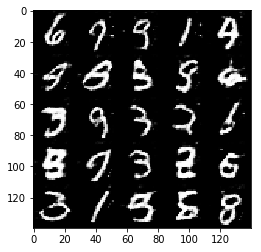

Epoch 2/2... Batch 3410... Discriminator Loss: 1.2630... Generator Loss: 4.0310
Epoch 2/2... Batch 3420... Discriminator Loss: 0.9022... Generator Loss: 0.9596
Epoch 2/2... Batch 3430... Discriminator Loss: 2.5583... Generator Loss: 0.1270
Epoch 2/2... Batch 3440... Discriminator Loss: 0.5705... Generator Loss: 1.4070
Epoch 2/2... Batch 3450... Discriminator Loss: 0.6198... Generator Loss: 1.2875
Epoch 2/2... Batch 3460... Discriminator Loss: 0.5948... Generator Loss: 1.3346
Epoch 2/2... Batch 3470... Discriminator Loss: 0.5036... Generator Loss: 1.1803
Epoch 2/2... Batch 3480... Discriminator Loss: 0.4332... Generator Loss: 1.4035
Epoch 2/2... Batch 3490... Discriminator Loss: 0.7153... Generator Loss: 4.1612
Epoch 2/2... Batch 3500... Discriminator Loss: 1.1592... Generator Loss: 0.6178


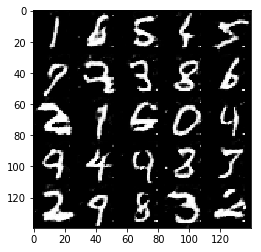

Epoch 2/2... Batch 3510... Discriminator Loss: 0.6391... Generator Loss: 0.9527
Epoch 2/2... Batch 3520... Discriminator Loss: 0.6024... Generator Loss: 1.0529
Epoch 2/2... Batch 3530... Discriminator Loss: 0.4896... Generator Loss: 1.4219
Epoch 2/2... Batch 3540... Discriminator Loss: 0.5711... Generator Loss: 1.1483
Epoch 2/2... Batch 3550... Discriminator Loss: 0.2243... Generator Loss: 2.4537
Epoch 2/2... Batch 3560... Discriminator Loss: 1.8174... Generator Loss: 0.5031
Epoch 2/2... Batch 3570... Discriminator Loss: 0.4998... Generator Loss: 1.2440
Epoch 2/2... Batch 3580... Discriminator Loss: 0.5597... Generator Loss: 1.1529
Epoch 2/2... Batch 3590... Discriminator Loss: 2.0833... Generator Loss: 4.6744
Epoch 2/2... Batch 3600... Discriminator Loss: 0.4774... Generator Loss: 1.9866


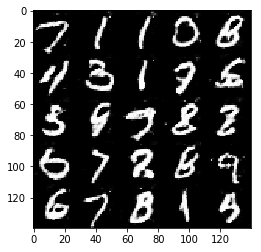

Epoch 2/2... Batch 3610... Discriminator Loss: 1.3507... Generator Loss: 4.9709
Epoch 2/2... Batch 3620... Discriminator Loss: 0.6940... Generator Loss: 2.6962
Epoch 2/2... Batch 3630... Discriminator Loss: 0.6169... Generator Loss: 1.0598
Epoch 2/2... Batch 3640... Discriminator Loss: 1.5794... Generator Loss: 0.3156
Epoch 2/2... Batch 3650... Discriminator Loss: 0.6342... Generator Loss: 0.9345
Epoch 2/2... Batch 3660... Discriminator Loss: 0.3027... Generator Loss: 1.8469
Epoch 2/2... Batch 3670... Discriminator Loss: 0.4758... Generator Loss: 1.7491
Epoch 2/2... Batch 3680... Discriminator Loss: 0.5041... Generator Loss: 1.4875
Epoch 2/2... Batch 3690... Discriminator Loss: 0.4254... Generator Loss: 1.4345
Epoch 2/2... Batch 3700... Discriminator Loss: 1.2879... Generator Loss: 2.9420


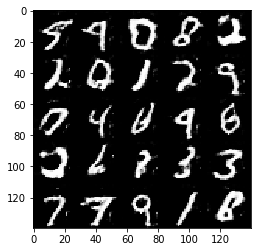

Epoch 2/2... Batch 3710... Discriminator Loss: 0.8396... Generator Loss: 2.6735
Epoch 2/2... Batch 3720... Discriminator Loss: 0.6526... Generator Loss: 2.7267
Epoch 2/2... Batch 3730... Discriminator Loss: 0.5483... Generator Loss: 1.2014
Epoch 2/2... Batch 3740... Discriminator Loss: 0.7842... Generator Loss: 0.9197
Epoch 2/2... Batch 3750... Discriminator Loss: 0.5577... Generator Loss: 1.1672


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 0.9293... Generator Loss: 4.6178
Epoch 1/1... Batch 20... Discriminator Loss: 1.3472... Generator Loss: 6.4690
Epoch 1/1... Batch 30... Discriminator Loss: 0.4701... Generator Loss: 1.4569
Epoch 1/1... Batch 40... Discriminator Loss: 1.3980... Generator Loss: 6.2590
Epoch 1/1... Batch 50... Discriminator Loss: 3.4545... Generator Loss: 0.0445
Epoch 1/1... Batch 60... Discriminator Loss: 1.1009... Generator Loss: 0.6570
Epoch 1/1... Batch 70... Discriminator Loss: 0.8478... Generator Loss: 7.0559
Epoch 1/1... Batch 80... Discriminator Loss: 0.5560... Generator Loss: 4.3594
Epoch 1/1... Batch 90... Discriminator Loss: 0.6818... Generator Loss: 1.2792
Epoch 1/1... Batch 100... Discriminator Loss: 1.1214... Generator Loss: 0.5480


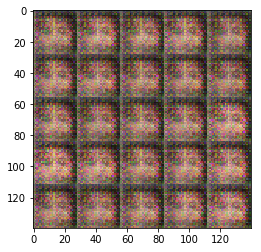

Epoch 1/1... Batch 110... Discriminator Loss: 1.1927... Generator Loss: 0.4901
Epoch 1/1... Batch 120... Discriminator Loss: 2.0369... Generator Loss: 0.2242
Epoch 1/1... Batch 130... Discriminator Loss: 1.2792... Generator Loss: 0.6574
Epoch 1/1... Batch 140... Discriminator Loss: 1.3093... Generator Loss: 1.7518
Epoch 1/1... Batch 150... Discriminator Loss: 1.0852... Generator Loss: 1.7641
Epoch 1/1... Batch 160... Discriminator Loss: 2.0522... Generator Loss: 0.5253
Epoch 1/1... Batch 170... Discriminator Loss: 1.5753... Generator Loss: 0.3811
Epoch 1/1... Batch 180... Discriminator Loss: 1.1223... Generator Loss: 0.7062
Epoch 1/1... Batch 190... Discriminator Loss: 1.2497... Generator Loss: 0.6594
Epoch 1/1... Batch 200... Discriminator Loss: 1.3202... Generator Loss: 0.4685


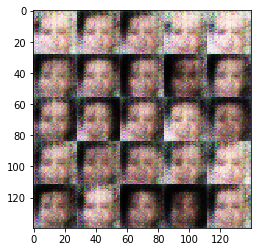

Epoch 1/1... Batch 210... Discriminator Loss: 1.5817... Generator Loss: 0.4117
Epoch 1/1... Batch 220... Discriminator Loss: 1.2982... Generator Loss: 1.0016
Epoch 1/1... Batch 230... Discriminator Loss: 1.2579... Generator Loss: 0.5509
Epoch 1/1... Batch 240... Discriminator Loss: 1.2772... Generator Loss: 2.0282
Epoch 1/1... Batch 250... Discriminator Loss: 0.8452... Generator Loss: 0.9409
Epoch 1/1... Batch 260... Discriminator Loss: 1.7469... Generator Loss: 0.3216
Epoch 1/1... Batch 270... Discriminator Loss: 1.7351... Generator Loss: 0.3034
Epoch 1/1... Batch 280... Discriminator Loss: 1.2725... Generator Loss: 0.5359
Epoch 1/1... Batch 290... Discriminator Loss: 1.9038... Generator Loss: 0.2601
Epoch 1/1... Batch 300... Discriminator Loss: 1.0538... Generator Loss: 1.3314


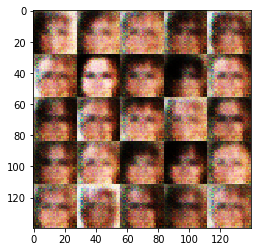

Epoch 1/1... Batch 310... Discriminator Loss: 1.8741... Generator Loss: 0.2438
Epoch 1/1... Batch 320... Discriminator Loss: 1.5379... Generator Loss: 0.3046
Epoch 1/1... Batch 330... Discriminator Loss: 1.2692... Generator Loss: 1.0037
Epoch 1/1... Batch 340... Discriminator Loss: 1.5191... Generator Loss: 0.3571
Epoch 1/1... Batch 350... Discriminator Loss: 1.3639... Generator Loss: 0.4862
Epoch 1/1... Batch 360... Discriminator Loss: 1.4046... Generator Loss: 0.4170
Epoch 1/1... Batch 370... Discriminator Loss: 1.1290... Generator Loss: 0.6005
Epoch 1/1... Batch 380... Discriminator Loss: 0.9580... Generator Loss: 2.3115
Epoch 1/1... Batch 390... Discriminator Loss: 1.2442... Generator Loss: 1.3643
Epoch 1/1... Batch 400... Discriminator Loss: 0.9371... Generator Loss: 1.5374


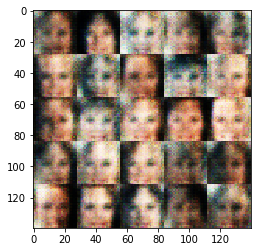

Epoch 1/1... Batch 410... Discriminator Loss: 0.7748... Generator Loss: 1.4060
Epoch 1/1... Batch 420... Discriminator Loss: 0.9980... Generator Loss: 2.1361
Epoch 1/1... Batch 430... Discriminator Loss: 0.9691... Generator Loss: 1.5636
Epoch 1/1... Batch 440... Discriminator Loss: 0.6672... Generator Loss: 1.4566
Epoch 1/1... Batch 450... Discriminator Loss: 0.7830... Generator Loss: 2.1104
Epoch 1/1... Batch 460... Discriminator Loss: 0.6820... Generator Loss: 1.8129
Epoch 1/1... Batch 470... Discriminator Loss: 1.2348... Generator Loss: 1.2722
Epoch 1/1... Batch 480... Discriminator Loss: 1.9680... Generator Loss: 0.2081
Epoch 1/1... Batch 490... Discriminator Loss: 1.9481... Generator Loss: 0.2079
Epoch 1/1... Batch 500... Discriminator Loss: 1.1937... Generator Loss: 0.5366


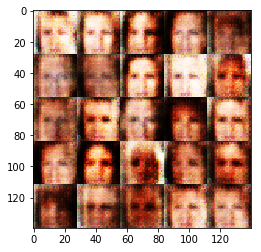

Epoch 1/1... Batch 510... Discriminator Loss: 0.9786... Generator Loss: 0.6506
Epoch 1/1... Batch 520... Discriminator Loss: 0.7981... Generator Loss: 0.8508
Epoch 1/1... Batch 530... Discriminator Loss: 0.8115... Generator Loss: 1.3778
Epoch 1/1... Batch 540... Discriminator Loss: 1.1664... Generator Loss: 0.6215
Epoch 1/1... Batch 550... Discriminator Loss: 1.1248... Generator Loss: 1.5188
Epoch 1/1... Batch 560... Discriminator Loss: 1.2114... Generator Loss: 1.4664
Epoch 1/1... Batch 570... Discriminator Loss: 0.7170... Generator Loss: 1.9029
Epoch 1/1... Batch 580... Discriminator Loss: 0.6382... Generator Loss: 1.1426
Epoch 1/1... Batch 590... Discriminator Loss: 0.7241... Generator Loss: 0.9276
Epoch 1/1... Batch 600... Discriminator Loss: 0.8000... Generator Loss: 0.8583


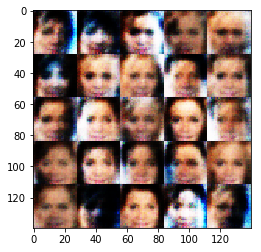

Epoch 1/1... Batch 610... Discriminator Loss: 0.7334... Generator Loss: 3.1229
Epoch 1/1... Batch 620... Discriminator Loss: 1.2471... Generator Loss: 2.6443
Epoch 1/1... Batch 630... Discriminator Loss: 0.8311... Generator Loss: 1.7215
Epoch 1/1... Batch 640... Discriminator Loss: 0.8244... Generator Loss: 0.8366
Epoch 1/1... Batch 650... Discriminator Loss: 1.4196... Generator Loss: 0.3816
Epoch 1/1... Batch 660... Discriminator Loss: 1.6584... Generator Loss: 0.3014
Epoch 1/1... Batch 670... Discriminator Loss: 0.7246... Generator Loss: 0.9517
Epoch 1/1... Batch 680... Discriminator Loss: 1.9880... Generator Loss: 0.1939
Epoch 1/1... Batch 690... Discriminator Loss: 1.9988... Generator Loss: 0.1846
Epoch 1/1... Batch 700... Discriminator Loss: 0.9264... Generator Loss: 0.9363


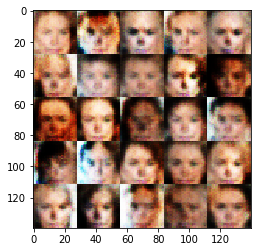

Epoch 1/1... Batch 710... Discriminator Loss: 1.2120... Generator Loss: 1.7180
Epoch 1/1... Batch 720... Discriminator Loss: 0.7567... Generator Loss: 1.8830
Epoch 1/1... Batch 730... Discriminator Loss: 1.0468... Generator Loss: 0.5381
Epoch 1/1... Batch 740... Discriminator Loss: 1.5002... Generator Loss: 0.3574
Epoch 1/1... Batch 750... Discriminator Loss: 1.6204... Generator Loss: 0.3260
Epoch 1/1... Batch 760... Discriminator Loss: 1.7188... Generator Loss: 0.2821
Epoch 1/1... Batch 770... Discriminator Loss: 1.3598... Generator Loss: 0.4311
Epoch 1/1... Batch 780... Discriminator Loss: 1.1277... Generator Loss: 0.4991
Epoch 1/1... Batch 790... Discriminator Loss: 1.3731... Generator Loss: 0.3948
Epoch 1/1... Batch 800... Discriminator Loss: 0.9639... Generator Loss: 0.6625


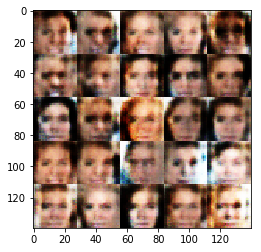

Epoch 1/1... Batch 810... Discriminator Loss: 0.7835... Generator Loss: 0.8961
Epoch 1/1... Batch 820... Discriminator Loss: 1.5526... Generator Loss: 0.3371
Epoch 1/1... Batch 830... Discriminator Loss: 2.0865... Generator Loss: 0.1987
Epoch 1/1... Batch 840... Discriminator Loss: 0.9100... Generator Loss: 0.7230
Epoch 1/1... Batch 850... Discriminator Loss: 1.2878... Generator Loss: 0.3845
Epoch 1/1... Batch 860... Discriminator Loss: 2.2869... Generator Loss: 0.1300
Epoch 1/1... Batch 870... Discriminator Loss: 1.2734... Generator Loss: 0.5061
Epoch 1/1... Batch 880... Discriminator Loss: 1.0578... Generator Loss: 0.6190
Epoch 1/1... Batch 890... Discriminator Loss: 1.2635... Generator Loss: 0.4362
Epoch 1/1... Batch 900... Discriminator Loss: 1.9000... Generator Loss: 0.2129


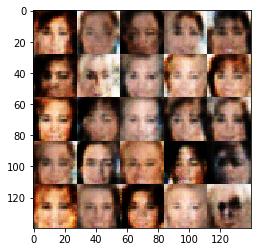

Epoch 1/1... Batch 910... Discriminator Loss: 1.7149... Generator Loss: 0.3093
Epoch 1/1... Batch 920... Discriminator Loss: 1.0146... Generator Loss: 1.3915
Epoch 1/1... Batch 930... Discriminator Loss: 0.6421... Generator Loss: 1.7266
Epoch 1/1... Batch 940... Discriminator Loss: 1.3039... Generator Loss: 1.2176
Epoch 1/1... Batch 950... Discriminator Loss: 1.2399... Generator Loss: 1.6353
Epoch 1/1... Batch 960... Discriminator Loss: 0.8751... Generator Loss: 1.5914
Epoch 1/1... Batch 970... Discriminator Loss: 0.9181... Generator Loss: 3.1697
Epoch 1/1... Batch 980... Discriminator Loss: 1.2013... Generator Loss: 2.0427
Epoch 1/1... Batch 990... Discriminator Loss: 0.7307... Generator Loss: 1.6139
Epoch 1/1... Batch 1000... Discriminator Loss: 0.6657... Generator Loss: 1.9088


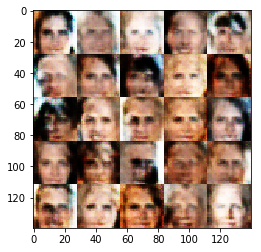

Epoch 1/1... Batch 1010... Discriminator Loss: 1.2239... Generator Loss: 3.8064
Epoch 1/1... Batch 1020... Discriminator Loss: 0.6440... Generator Loss: 2.1346
Epoch 1/1... Batch 1030... Discriminator Loss: 0.9821... Generator Loss: 2.1438
Epoch 1/1... Batch 1040... Discriminator Loss: 0.7546... Generator Loss: 3.8386
Epoch 1/1... Batch 1050... Discriminator Loss: 0.9884... Generator Loss: 4.3220
Epoch 1/1... Batch 1060... Discriminator Loss: 0.6572... Generator Loss: 2.1619
Epoch 1/1... Batch 1070... Discriminator Loss: 0.6843... Generator Loss: 2.4549
Epoch 1/1... Batch 1080... Discriminator Loss: 0.7017... Generator Loss: 2.3019
Epoch 1/1... Batch 1090... Discriminator Loss: 1.1256... Generator Loss: 2.4012
Epoch 1/1... Batch 1100... Discriminator Loss: 0.6730... Generator Loss: 1.0385


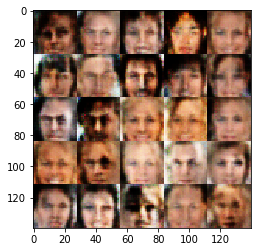

Epoch 1/1... Batch 1110... Discriminator Loss: 1.6243... Generator Loss: 0.2690
Epoch 1/1... Batch 1120... Discriminator Loss: 1.6642... Generator Loss: 0.2739
Epoch 1/1... Batch 1130... Discriminator Loss: 0.8979... Generator Loss: 0.7340
Epoch 1/1... Batch 1140... Discriminator Loss: 1.9073... Generator Loss: 0.2089
Epoch 1/1... Batch 1150... Discriminator Loss: 1.4565... Generator Loss: 0.3835
Epoch 1/1... Batch 1160... Discriminator Loss: 1.4403... Generator Loss: 0.3358
Epoch 1/1... Batch 1170... Discriminator Loss: 1.4970... Generator Loss: 0.3205
Epoch 1/1... Batch 1180... Discriminator Loss: 0.5409... Generator Loss: 1.5713
Epoch 1/1... Batch 1190... Discriminator Loss: 1.3169... Generator Loss: 0.4798
Epoch 1/1... Batch 1200... Discriminator Loss: 1.2704... Generator Loss: 0.4192


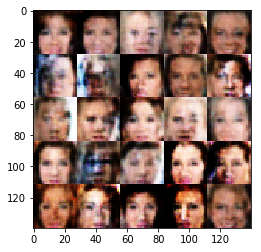

Epoch 1/1... Batch 1210... Discriminator Loss: 2.2393... Generator Loss: 0.1406
Epoch 1/1... Batch 1220... Discriminator Loss: 1.0680... Generator Loss: 2.2074
Epoch 1/1... Batch 1230... Discriminator Loss: 0.7462... Generator Loss: 1.7602
Epoch 1/1... Batch 1240... Discriminator Loss: 1.3110... Generator Loss: 1.4601
Epoch 1/1... Batch 1250... Discriminator Loss: 0.8373... Generator Loss: 2.8978
Epoch 1/1... Batch 1260... Discriminator Loss: 1.0001... Generator Loss: 1.3378
Epoch 1/1... Batch 1270... Discriminator Loss: 0.6362... Generator Loss: 1.4565
Epoch 1/1... Batch 1280... Discriminator Loss: 1.1351... Generator Loss: 1.3223
Epoch 1/1... Batch 1290... Discriminator Loss: 0.9990... Generator Loss: 0.9353
Epoch 1/1... Batch 1300... Discriminator Loss: 1.4517... Generator Loss: 0.3524


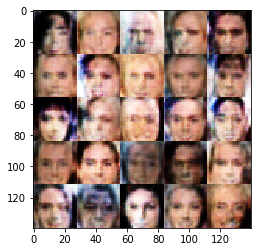

Epoch 1/1... Batch 1310... Discriminator Loss: 1.0221... Generator Loss: 0.5934
Epoch 1/1... Batch 1320... Discriminator Loss: 1.3652... Generator Loss: 0.3589
Epoch 1/1... Batch 1330... Discriminator Loss: 1.1499... Generator Loss: 0.5060
Epoch 1/1... Batch 1340... Discriminator Loss: 0.8650... Generator Loss: 3.6173
Epoch 1/1... Batch 1350... Discriminator Loss: 0.2325... Generator Loss: 2.5502
Epoch 1/1... Batch 1360... Discriminator Loss: 0.3396... Generator Loss: 3.4657
Epoch 1/1... Batch 1370... Discriminator Loss: 0.6410... Generator Loss: 1.6947
Epoch 1/1... Batch 1380... Discriminator Loss: 1.1415... Generator Loss: 1.6332
Epoch 1/1... Batch 1390... Discriminator Loss: 0.5057... Generator Loss: 1.3675
Epoch 1/1... Batch 1400... Discriminator Loss: 1.2021... Generator Loss: 1.0736


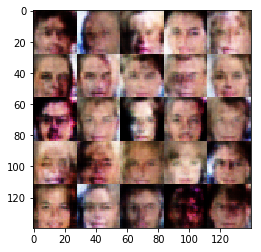

Epoch 1/1... Batch 1410... Discriminator Loss: 1.4364... Generator Loss: 0.3570
Epoch 1/1... Batch 1420... Discriminator Loss: 1.5375... Generator Loss: 0.3280
Epoch 1/1... Batch 1430... Discriminator Loss: 1.5768... Generator Loss: 0.2958
Epoch 1/1... Batch 1440... Discriminator Loss: 1.4220... Generator Loss: 0.3318
Epoch 1/1... Batch 1450... Discriminator Loss: 0.7300... Generator Loss: 2.0419
Epoch 1/1... Batch 1460... Discriminator Loss: 1.9396... Generator Loss: 0.1769
Epoch 1/1... Batch 1470... Discriminator Loss: 0.9321... Generator Loss: 0.6702
Epoch 1/1... Batch 1480... Discriminator Loss: 1.7580... Generator Loss: 2.1855
Epoch 1/1... Batch 1490... Discriminator Loss: 0.6207... Generator Loss: 2.0251
Epoch 1/1... Batch 1500... Discriminator Loss: 0.7807... Generator Loss: 0.8359


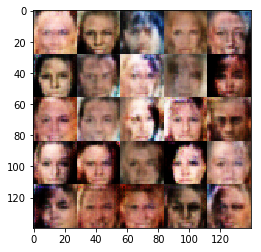

Epoch 1/1... Batch 1510... Discriminator Loss: 1.2266... Generator Loss: 0.5486
Epoch 1/1... Batch 1520... Discriminator Loss: 1.0986... Generator Loss: 0.5068
Epoch 1/1... Batch 1530... Discriminator Loss: 1.1965... Generator Loss: 0.4818
Epoch 1/1... Batch 1540... Discriminator Loss: 1.8545... Generator Loss: 0.2094
Epoch 1/1... Batch 1550... Discriminator Loss: 1.0998... Generator Loss: 0.5378
Epoch 1/1... Batch 1560... Discriminator Loss: 0.9474... Generator Loss: 1.1050
Epoch 1/1... Batch 1570... Discriminator Loss: 0.9582... Generator Loss: 1.9153
Epoch 1/1... Batch 1580... Discriminator Loss: 0.5919... Generator Loss: 1.6849
Epoch 1/1... Batch 1590... Discriminator Loss: 1.1318... Generator Loss: 0.6355
Epoch 1/1... Batch 1600... Discriminator Loss: 1.2115... Generator Loss: 0.5101


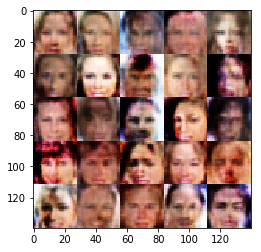

Epoch 1/1... Batch 1610... Discriminator Loss: 1.2875... Generator Loss: 0.4277
Epoch 1/1... Batch 1620... Discriminator Loss: 1.1184... Generator Loss: 2.1760
Epoch 1/1... Batch 1630... Discriminator Loss: 0.6839... Generator Loss: 2.0794
Epoch 1/1... Batch 1640... Discriminator Loss: 1.8650... Generator Loss: 2.1137
Epoch 1/1... Batch 1650... Discriminator Loss: 1.1767... Generator Loss: 1.2850
Epoch 1/1... Batch 1660... Discriminator Loss: 1.4925... Generator Loss: 0.3132
Epoch 1/1... Batch 1670... Discriminator Loss: 0.8926... Generator Loss: 2.4069
Epoch 1/1... Batch 1680... Discriminator Loss: 1.3355... Generator Loss: 0.4196
Epoch 1/1... Batch 1690... Discriminator Loss: 1.0342... Generator Loss: 0.6349
Epoch 1/1... Batch 1700... Discriminator Loss: 1.4028... Generator Loss: 0.4039


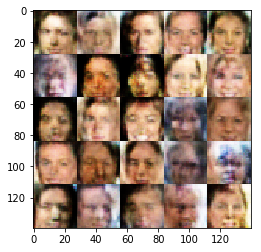

Epoch 1/1... Batch 1710... Discriminator Loss: 0.7102... Generator Loss: 1.2563
Epoch 1/1... Batch 1720... Discriminator Loss: 1.1902... Generator Loss: 0.7919
Epoch 1/1... Batch 1730... Discriminator Loss: 0.8612... Generator Loss: 1.9504
Epoch 1/1... Batch 1740... Discriminator Loss: 0.7286... Generator Loss: 1.4550
Epoch 1/1... Batch 1750... Discriminator Loss: 1.3589... Generator Loss: 0.4231
Epoch 1/1... Batch 1760... Discriminator Loss: 1.1390... Generator Loss: 0.5078
Epoch 1/1... Batch 1770... Discriminator Loss: 0.6007... Generator Loss: 1.1087
Epoch 1/1... Batch 1780... Discriminator Loss: 0.8828... Generator Loss: 1.0289
Epoch 1/1... Batch 1790... Discriminator Loss: 1.1472... Generator Loss: 0.7805
Epoch 1/1... Batch 1800... Discriminator Loss: 0.9898... Generator Loss: 0.9785


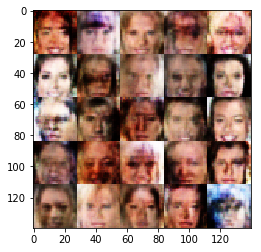

Epoch 1/1... Batch 1810... Discriminator Loss: 1.0634... Generator Loss: 0.5513
Epoch 1/1... Batch 1820... Discriminator Loss: 1.5433... Generator Loss: 0.2918
Epoch 1/1... Batch 1830... Discriminator Loss: 0.6018... Generator Loss: 1.0767
Epoch 1/1... Batch 1840... Discriminator Loss: 1.6001... Generator Loss: 0.3139
Epoch 1/1... Batch 1850... Discriminator Loss: 1.0796... Generator Loss: 1.9808
Epoch 1/1... Batch 1860... Discriminator Loss: 0.9702... Generator Loss: 0.7678
Epoch 1/1... Batch 1870... Discriminator Loss: 0.5047... Generator Loss: 1.2954
Epoch 1/1... Batch 1880... Discriminator Loss: 0.4797... Generator Loss: 2.0780
Epoch 1/1... Batch 1890... Discriminator Loss: 1.6994... Generator Loss: 0.2219
Epoch 1/1... Batch 1900... Discriminator Loss: 0.6629... Generator Loss: 1.2097


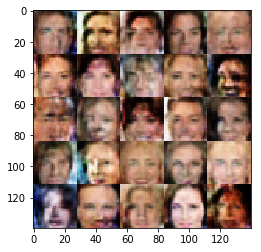

Epoch 1/1... Batch 1910... Discriminator Loss: 1.1555... Generator Loss: 1.4278
Epoch 1/1... Batch 1920... Discriminator Loss: 1.7851... Generator Loss: 0.2241
Epoch 1/1... Batch 1930... Discriminator Loss: 1.2170... Generator Loss: 1.0144
Epoch 1/1... Batch 1940... Discriminator Loss: 1.0530... Generator Loss: 0.6483
Epoch 1/1... Batch 1950... Discriminator Loss: 1.6680... Generator Loss: 0.2426
Epoch 1/1... Batch 1960... Discriminator Loss: 1.6923... Generator Loss: 0.2518
Epoch 1/1... Batch 1970... Discriminator Loss: 0.8100... Generator Loss: 3.3433
Epoch 1/1... Batch 1980... Discriminator Loss: 1.3545... Generator Loss: 0.3608
Epoch 1/1... Batch 1990... Discriminator Loss: 1.4415... Generator Loss: 0.3121
Epoch 1/1... Batch 2000... Discriminator Loss: 1.1111... Generator Loss: 0.5243


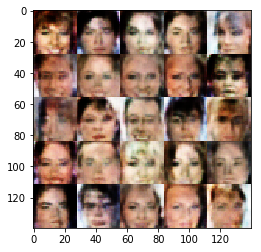

Epoch 1/1... Batch 2010... Discriminator Loss: 1.7082... Generator Loss: 0.2554
Epoch 1/1... Batch 2020... Discriminator Loss: 0.5937... Generator Loss: 1.8893
Epoch 1/1... Batch 2030... Discriminator Loss: 1.0583... Generator Loss: 0.5215
Epoch 1/1... Batch 2040... Discriminator Loss: 0.3589... Generator Loss: 2.3755
Epoch 1/1... Batch 2050... Discriminator Loss: 1.3542... Generator Loss: 0.4520
Epoch 1/1... Batch 2060... Discriminator Loss: 1.1163... Generator Loss: 0.6133
Epoch 1/1... Batch 2070... Discriminator Loss: 1.0757... Generator Loss: 1.1587
Epoch 1/1... Batch 2080... Discriminator Loss: 1.4007... Generator Loss: 1.5334
Epoch 1/1... Batch 2090... Discriminator Loss: 1.4229... Generator Loss: 0.3319
Epoch 1/1... Batch 2100... Discriminator Loss: 0.9201... Generator Loss: 0.7214


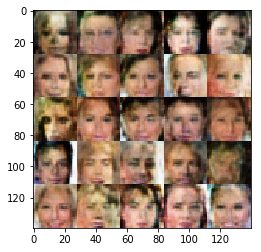

Epoch 1/1... Batch 2110... Discriminator Loss: 1.1153... Generator Loss: 0.5626
Epoch 1/1... Batch 2120... Discriminator Loss: 0.8889... Generator Loss: 0.6625
Epoch 1/1... Batch 2130... Discriminator Loss: 1.0927... Generator Loss: 0.6686
Epoch 1/1... Batch 2140... Discriminator Loss: 1.1966... Generator Loss: 0.5847
Epoch 1/1... Batch 2150... Discriminator Loss: 0.8676... Generator Loss: 1.1218
Epoch 1/1... Batch 2160... Discriminator Loss: 1.8375... Generator Loss: 0.2371
Epoch 1/1... Batch 2170... Discriminator Loss: 0.6602... Generator Loss: 2.1635
Epoch 1/1... Batch 2180... Discriminator Loss: 0.7367... Generator Loss: 1.5460
Epoch 1/1... Batch 2190... Discriminator Loss: 1.3933... Generator Loss: 1.1123
Epoch 1/1... Batch 2200... Discriminator Loss: 1.0245... Generator Loss: 0.6010


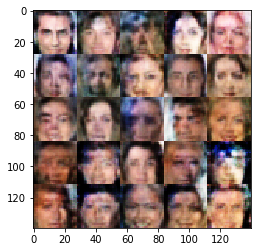

Epoch 1/1... Batch 2210... Discriminator Loss: 1.0288... Generator Loss: 0.7865
Epoch 1/1... Batch 2220... Discriminator Loss: 2.1931... Generator Loss: 0.1420
Epoch 1/1... Batch 2230... Discriminator Loss: 1.5920... Generator Loss: 0.3128
Epoch 1/1... Batch 2240... Discriminator Loss: 1.2821... Generator Loss: 0.4852
Epoch 1/1... Batch 2250... Discriminator Loss: 1.4529... Generator Loss: 0.3536
Epoch 1/1... Batch 2260... Discriminator Loss: 2.0074... Generator Loss: 0.1939
Epoch 1/1... Batch 2270... Discriminator Loss: 1.3090... Generator Loss: 0.4195
Epoch 1/1... Batch 2280... Discriminator Loss: 1.0639... Generator Loss: 0.5873
Epoch 1/1... Batch 2290... Discriminator Loss: 1.3371... Generator Loss: 0.4193
Epoch 1/1... Batch 2300... Discriminator Loss: 1.2894... Generator Loss: 0.4135


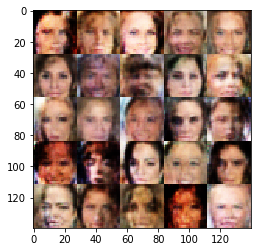

Epoch 1/1... Batch 2310... Discriminator Loss: 1.2547... Generator Loss: 1.4496
Epoch 1/1... Batch 2320... Discriminator Loss: 0.9990... Generator Loss: 2.3254
Epoch 1/1... Batch 2330... Discriminator Loss: 1.4676... Generator Loss: 0.3646
Epoch 1/1... Batch 2340... Discriminator Loss: 0.8519... Generator Loss: 0.7183
Epoch 1/1... Batch 2350... Discriminator Loss: 1.9923... Generator Loss: 0.1751
Epoch 1/1... Batch 2360... Discriminator Loss: 1.3772... Generator Loss: 0.3512
Epoch 1/1... Batch 2370... Discriminator Loss: 1.0913... Generator Loss: 1.9928
Epoch 1/1... Batch 2380... Discriminator Loss: 1.3219... Generator Loss: 0.4867
Epoch 1/1... Batch 2390... Discriminator Loss: 1.1906... Generator Loss: 0.5554
Epoch 1/1... Batch 2400... Discriminator Loss: 0.8587... Generator Loss: 0.7477


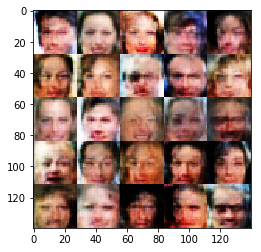

Epoch 1/1... Batch 2410... Discriminator Loss: 1.4359... Generator Loss: 0.3327
Epoch 1/1... Batch 2420... Discriminator Loss: 0.6674... Generator Loss: 1.5608
Epoch 1/1... Batch 2430... Discriminator Loss: 1.7055... Generator Loss: 1.9072
Epoch 1/1... Batch 2440... Discriminator Loss: 1.6736... Generator Loss: 0.3072
Epoch 1/1... Batch 2450... Discriminator Loss: 0.8435... Generator Loss: 1.0340
Epoch 1/1... Batch 2460... Discriminator Loss: 1.0746... Generator Loss: 0.7738
Epoch 1/1... Batch 2470... Discriminator Loss: 1.1212... Generator Loss: 0.5389
Epoch 1/1... Batch 2480... Discriminator Loss: 1.2335... Generator Loss: 0.4706
Epoch 1/1... Batch 2490... Discriminator Loss: 1.5696... Generator Loss: 0.2859
Epoch 1/1... Batch 2500... Discriminator Loss: 1.4902... Generator Loss: 0.3381


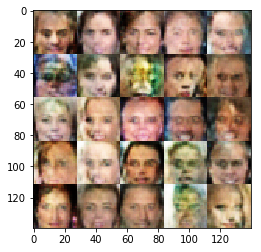

Epoch 1/1... Batch 2510... Discriminator Loss: 0.6683... Generator Loss: 0.9576
Epoch 1/1... Batch 2520... Discriminator Loss: 0.5652... Generator Loss: 1.5353
Epoch 1/1... Batch 2530... Discriminator Loss: 1.1194... Generator Loss: 0.5854
Epoch 1/1... Batch 2540... Discriminator Loss: 2.1595... Generator Loss: 0.1582
Epoch 1/1... Batch 2550... Discriminator Loss: 1.3267... Generator Loss: 0.4849
Epoch 1/1... Batch 2560... Discriminator Loss: 1.5900... Generator Loss: 0.2802
Epoch 1/1... Batch 2570... Discriminator Loss: 1.5998... Generator Loss: 1.7439
Epoch 1/1... Batch 2580... Discriminator Loss: 0.6717... Generator Loss: 2.2051
Epoch 1/1... Batch 2590... Discriminator Loss: 0.6132... Generator Loss: 1.2988
Epoch 1/1... Batch 2600... Discriminator Loss: 1.4040... Generator Loss: 1.5362


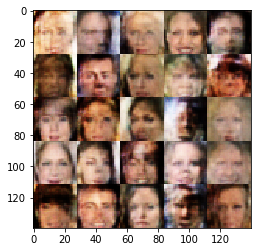

Epoch 1/1... Batch 2610... Discriminator Loss: 0.7403... Generator Loss: 0.8998
Epoch 1/1... Batch 2620... Discriminator Loss: 1.6128... Generator Loss: 0.2683
Epoch 1/1... Batch 2630... Discriminator Loss: 1.2841... Generator Loss: 0.4158
Epoch 1/1... Batch 2640... Discriminator Loss: 1.2562... Generator Loss: 0.4603
Epoch 1/1... Batch 2650... Discriminator Loss: 1.1640... Generator Loss: 2.1695
Epoch 1/1... Batch 2660... Discriminator Loss: 0.5645... Generator Loss: 1.6779
Epoch 1/1... Batch 2670... Discriminator Loss: 1.4151... Generator Loss: 0.3793
Epoch 1/1... Batch 2680... Discriminator Loss: 1.4311... Generator Loss: 0.3549
Epoch 1/1... Batch 2690... Discriminator Loss: 0.9602... Generator Loss: 0.6751
Epoch 1/1... Batch 2700... Discriminator Loss: 1.2220... Generator Loss: 0.5178


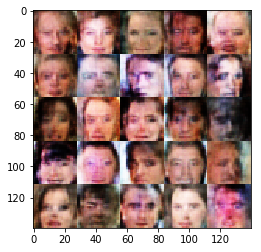

Epoch 1/1... Batch 2710... Discriminator Loss: 0.8314... Generator Loss: 0.8426
Epoch 1/1... Batch 2720... Discriminator Loss: 0.8374... Generator Loss: 1.0927
Epoch 1/1... Batch 2730... Discriminator Loss: 1.0179... Generator Loss: 0.6656
Epoch 1/1... Batch 2740... Discriminator Loss: 0.7799... Generator Loss: 1.6871
Epoch 1/1... Batch 2750... Discriminator Loss: 0.7066... Generator Loss: 1.2363
Epoch 1/1... Batch 2760... Discriminator Loss: 1.2914... Generator Loss: 0.4105
Epoch 1/1... Batch 2770... Discriminator Loss: 1.1395... Generator Loss: 1.3006
Epoch 1/1... Batch 2780... Discriminator Loss: 0.9635... Generator Loss: 2.2821
Epoch 1/1... Batch 2790... Discriminator Loss: 1.1162... Generator Loss: 0.5419
Epoch 1/1... Batch 2800... Discriminator Loss: 1.2692... Generator Loss: 0.4403


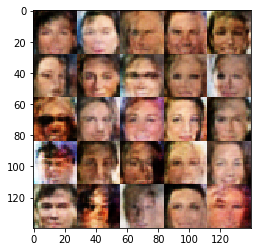

Epoch 1/1... Batch 2810... Discriminator Loss: 0.9941... Generator Loss: 0.6001
Epoch 1/1... Batch 2820... Discriminator Loss: 1.0170... Generator Loss: 0.9576
Epoch 1/1... Batch 2830... Discriminator Loss: 0.8120... Generator Loss: 0.8729
Epoch 1/1... Batch 2840... Discriminator Loss: 1.3017... Generator Loss: 0.4345
Epoch 1/1... Batch 2850... Discriminator Loss: 0.9761... Generator Loss: 0.6415
Epoch 1/1... Batch 2860... Discriminator Loss: 1.2281... Generator Loss: 1.7708
Epoch 1/1... Batch 2870... Discriminator Loss: 1.2179... Generator Loss: 0.5113
Epoch 1/1... Batch 2880... Discriminator Loss: 0.9056... Generator Loss: 1.8648
Epoch 1/1... Batch 2890... Discriminator Loss: 1.5214... Generator Loss: 0.3572
Epoch 1/1... Batch 2900... Discriminator Loss: 0.8254... Generator Loss: 1.2856


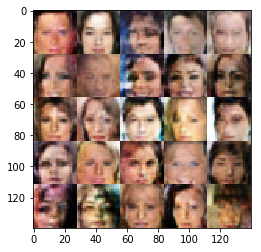

Epoch 1/1... Batch 2910... Discriminator Loss: 1.1279... Generator Loss: 1.2824
Epoch 1/1... Batch 2920... Discriminator Loss: 0.9146... Generator Loss: 0.8439
Epoch 1/1... Batch 2930... Discriminator Loss: 0.7026... Generator Loss: 1.0843
Epoch 1/1... Batch 2940... Discriminator Loss: 0.9308... Generator Loss: 0.7481
Epoch 1/1... Batch 2950... Discriminator Loss: 0.8556... Generator Loss: 1.1063
Epoch 1/1... Batch 2960... Discriminator Loss: 1.2323... Generator Loss: 0.4799
Epoch 1/1... Batch 2970... Discriminator Loss: 0.9146... Generator Loss: 0.9688
Epoch 1/1... Batch 2980... Discriminator Loss: 1.0298... Generator Loss: 1.2384
Epoch 1/1... Batch 2990... Discriminator Loss: 1.0654... Generator Loss: 0.5663
Epoch 1/1... Batch 3000... Discriminator Loss: 1.1294... Generator Loss: 0.5128


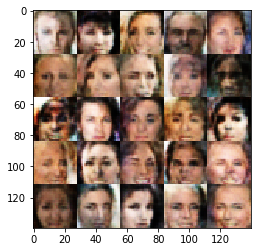

Epoch 1/1... Batch 3010... Discriminator Loss: 0.9327... Generator Loss: 0.6770
Epoch 1/1... Batch 3020... Discriminator Loss: 1.0140... Generator Loss: 0.7306
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0471... Generator Loss: 0.5554
Epoch 1/1... Batch 3040... Discriminator Loss: 1.2352... Generator Loss: 0.4667
Epoch 1/1... Batch 3050... Discriminator Loss: 0.8072... Generator Loss: 0.8858
Epoch 1/1... Batch 3060... Discriminator Loss: 0.8003... Generator Loss: 1.3269
Epoch 1/1... Batch 3070... Discriminator Loss: 1.0847... Generator Loss: 1.4205
Epoch 1/1... Batch 3080... Discriminator Loss: 1.1056... Generator Loss: 0.5941
Epoch 1/1... Batch 3090... Discriminator Loss: 1.6791... Generator Loss: 0.2408
Epoch 1/1... Batch 3100... Discriminator Loss: 0.8217... Generator Loss: 1.0996


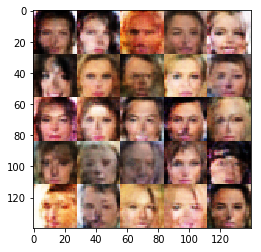

Epoch 1/1... Batch 3110... Discriminator Loss: 1.3273... Generator Loss: 0.3894
Epoch 1/1... Batch 3120... Discriminator Loss: 2.0987... Generator Loss: 0.1508
Epoch 1/1... Batch 3130... Discriminator Loss: 0.7944... Generator Loss: 1.1057
Epoch 1/1... Batch 3140... Discriminator Loss: 0.8157... Generator Loss: 1.0605
Epoch 1/1... Batch 3150... Discriminator Loss: 1.1335... Generator Loss: 0.4997
Epoch 1/1... Batch 3160... Discriminator Loss: 0.8740... Generator Loss: 1.0948
Epoch 1/1... Batch 3170... Discriminator Loss: 0.7999... Generator Loss: 0.8483
Epoch 1/1... Batch 3180... Discriminator Loss: 0.9549... Generator Loss: 1.1495
Epoch 1/1... Batch 3190... Discriminator Loss: 0.8196... Generator Loss: 1.3594
Epoch 1/1... Batch 3200... Discriminator Loss: 1.3570... Generator Loss: 0.3954


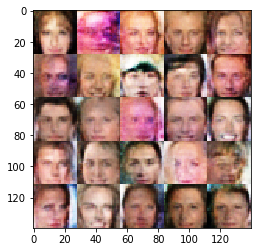

Epoch 1/1... Batch 3210... Discriminator Loss: 1.1903... Generator Loss: 0.5832
Epoch 1/1... Batch 3220... Discriminator Loss: 1.0396... Generator Loss: 0.7151
Epoch 1/1... Batch 3230... Discriminator Loss: 1.1652... Generator Loss: 0.4663
Epoch 1/1... Batch 3240... Discriminator Loss: 1.0250... Generator Loss: 0.8909
Epoch 1/1... Batch 3250... Discriminator Loss: 0.8349... Generator Loss: 0.8247
Epoch 1/1... Batch 3260... Discriminator Loss: 0.9814... Generator Loss: 0.9266
Epoch 1/1... Batch 3270... Discriminator Loss: 1.1581... Generator Loss: 1.0021
Epoch 1/1... Batch 3280... Discriminator Loss: 0.8452... Generator Loss: 0.8127
Epoch 1/1... Batch 3290... Discriminator Loss: 1.6781... Generator Loss: 0.3479
Epoch 1/1... Batch 3300... Discriminator Loss: 0.6245... Generator Loss: 1.1583


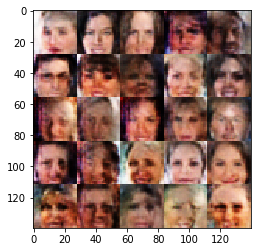

Epoch 1/1... Batch 3310... Discriminator Loss: 0.9987... Generator Loss: 0.8540
Epoch 1/1... Batch 3320... Discriminator Loss: 1.5587... Generator Loss: 0.2888
Epoch 1/1... Batch 3330... Discriminator Loss: 0.9434... Generator Loss: 1.2653
Epoch 1/1... Batch 3340... Discriminator Loss: 0.7667... Generator Loss: 2.0634
Epoch 1/1... Batch 3350... Discriminator Loss: 1.8191... Generator Loss: 0.2151
Epoch 1/1... Batch 3360... Discriminator Loss: 1.4188... Generator Loss: 0.3639
Epoch 1/1... Batch 3370... Discriminator Loss: 1.9011... Generator Loss: 0.2045
Epoch 1/1... Batch 3380... Discriminator Loss: 0.9288... Generator Loss: 0.8080
Epoch 1/1... Batch 3390... Discriminator Loss: 0.9084... Generator Loss: 1.3138
Epoch 1/1... Batch 3400... Discriminator Loss: 0.5725... Generator Loss: 1.8720


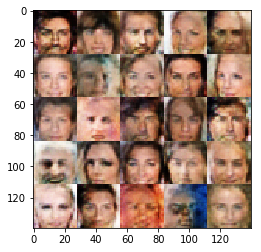

Epoch 1/1... Batch 3410... Discriminator Loss: 0.7150... Generator Loss: 1.8090
Epoch 1/1... Batch 3420... Discriminator Loss: 0.6878... Generator Loss: 1.0809
Epoch 1/1... Batch 3430... Discriminator Loss: 0.8164... Generator Loss: 1.0638
Epoch 1/1... Batch 3440... Discriminator Loss: 1.4884... Generator Loss: 0.3293
Epoch 1/1... Batch 3450... Discriminator Loss: 0.9368... Generator Loss: 0.8583
Epoch 1/1... Batch 3460... Discriminator Loss: 1.7576... Generator Loss: 0.2550
Epoch 1/1... Batch 3470... Discriminator Loss: 0.9324... Generator Loss: 2.3259
Epoch 1/1... Batch 3480... Discriminator Loss: 1.1256... Generator Loss: 0.7977
Epoch 1/1... Batch 3490... Discriminator Loss: 1.3416... Generator Loss: 0.4217
Epoch 1/1... Batch 3500... Discriminator Loss: 0.9464... Generator Loss: 0.7335


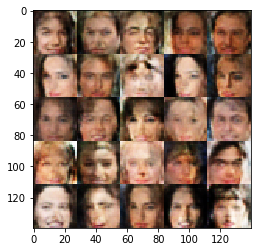

Epoch 1/1... Batch 3510... Discriminator Loss: 1.2017... Generator Loss: 0.4671
Epoch 1/1... Batch 3520... Discriminator Loss: 1.1281... Generator Loss: 0.9359
Epoch 1/1... Batch 3530... Discriminator Loss: 1.5042... Generator Loss: 0.3323
Epoch 1/1... Batch 3540... Discriminator Loss: 1.1021... Generator Loss: 0.4948
Epoch 1/1... Batch 3550... Discriminator Loss: 0.8599... Generator Loss: 1.1862
Epoch 1/1... Batch 3560... Discriminator Loss: 1.0491... Generator Loss: 0.5783
Epoch 1/1... Batch 3570... Discriminator Loss: 0.7653... Generator Loss: 2.1742
Epoch 1/1... Batch 3580... Discriminator Loss: 0.9822... Generator Loss: 0.6660
Epoch 1/1... Batch 3590... Discriminator Loss: 0.8311... Generator Loss: 1.2226
Epoch 1/1... Batch 3600... Discriminator Loss: 0.8989... Generator Loss: 1.1907


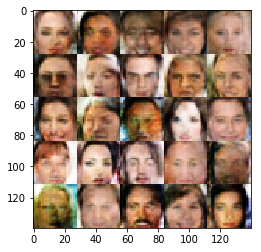

Epoch 1/1... Batch 3610... Discriminator Loss: 1.4282... Generator Loss: 0.3579
Epoch 1/1... Batch 3620... Discriminator Loss: 2.1740... Generator Loss: 0.1507
Epoch 1/1... Batch 3630... Discriminator Loss: 1.6978... Generator Loss: 0.2409
Epoch 1/1... Batch 3640... Discriminator Loss: 1.6764... Generator Loss: 0.2470
Epoch 1/1... Batch 3650... Discriminator Loss: 0.7652... Generator Loss: 1.0229
Epoch 1/1... Batch 3660... Discriminator Loss: 1.5121... Generator Loss: 0.3922
Epoch 1/1... Batch 3670... Discriminator Loss: 1.3840... Generator Loss: 0.3861
Epoch 1/1... Batch 3680... Discriminator Loss: 1.6610... Generator Loss: 0.2823
Epoch 1/1... Batch 3690... Discriminator Loss: 0.8775... Generator Loss: 1.0238
Epoch 1/1... Batch 3700... Discriminator Loss: 1.1670... Generator Loss: 0.4956


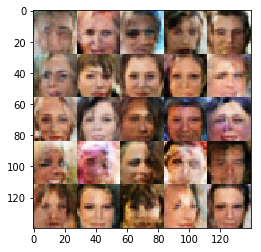

Epoch 1/1... Batch 3710... Discriminator Loss: 1.9848... Generator Loss: 0.1944
Epoch 1/1... Batch 3720... Discriminator Loss: 0.7250... Generator Loss: 0.9974
Epoch 1/1... Batch 3730... Discriminator Loss: 1.3953... Generator Loss: 0.3768
Epoch 1/1... Batch 3740... Discriminator Loss: 1.5960... Generator Loss: 0.2631
Epoch 1/1... Batch 3750... Discriminator Loss: 0.9077... Generator Loss: 1.0432
Epoch 1/1... Batch 3760... Discriminator Loss: 1.1991... Generator Loss: 0.8192
Epoch 1/1... Batch 3770... Discriminator Loss: 0.7341... Generator Loss: 1.3017
Epoch 1/1... Batch 3780... Discriminator Loss: 1.5183... Generator Loss: 0.3085
Epoch 1/1... Batch 3790... Discriminator Loss: 0.9495... Generator Loss: 0.9705
Epoch 1/1... Batch 3800... Discriminator Loss: 0.4316... Generator Loss: 1.8001


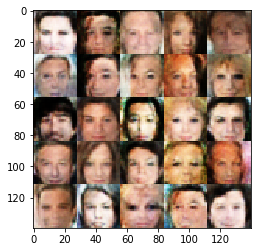

Epoch 1/1... Batch 3810... Discriminator Loss: 1.1420... Generator Loss: 0.9064
Epoch 1/1... Batch 3820... Discriminator Loss: 0.7553... Generator Loss: 0.8885
Epoch 1/1... Batch 3830... Discriminator Loss: 1.0547... Generator Loss: 0.6857
Epoch 1/1... Batch 3840... Discriminator Loss: 1.0137... Generator Loss: 0.9930
Epoch 1/1... Batch 3850... Discriminator Loss: 1.0795... Generator Loss: 0.6216
Epoch 1/1... Batch 3860... Discriminator Loss: 1.7143... Generator Loss: 0.4130
Epoch 1/1... Batch 3870... Discriminator Loss: 1.4727... Generator Loss: 0.3252
Epoch 1/1... Batch 3880... Discriminator Loss: 0.7995... Generator Loss: 1.2151
Epoch 1/1... Batch 3890... Discriminator Loss: 1.5314... Generator Loss: 0.2961
Epoch 1/1... Batch 3900... Discriminator Loss: 0.9166... Generator Loss: 0.8298


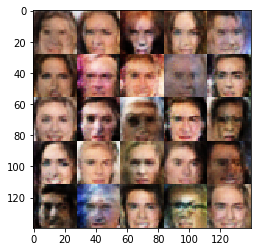

Epoch 1/1... Batch 3910... Discriminator Loss: 1.4367... Generator Loss: 0.4206
Epoch 1/1... Batch 3920... Discriminator Loss: 1.2800... Generator Loss: 0.4813
Epoch 1/1... Batch 3930... Discriminator Loss: 1.1808... Generator Loss: 0.5109
Epoch 1/1... Batch 3940... Discriminator Loss: 1.1291... Generator Loss: 0.5673
Epoch 1/1... Batch 3950... Discriminator Loss: 1.6385... Generator Loss: 0.2854
Epoch 1/1... Batch 3960... Discriminator Loss: 0.8386... Generator Loss: 0.7779
Epoch 1/1... Batch 3970... Discriminator Loss: 1.0510... Generator Loss: 1.2296
Epoch 1/1... Batch 3980... Discriminator Loss: 1.0179... Generator Loss: 0.8823
Epoch 1/1... Batch 3990... Discriminator Loss: 1.7224... Generator Loss: 0.2379
Epoch 1/1... Batch 4000... Discriminator Loss: 1.0241... Generator Loss: 0.5655


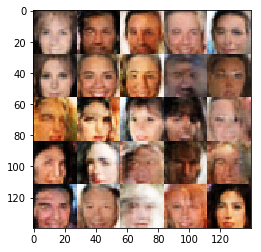

Epoch 1/1... Batch 4010... Discriminator Loss: 1.0518... Generator Loss: 0.6843
Epoch 1/1... Batch 4020... Discriminator Loss: 0.7843... Generator Loss: 1.0897
Epoch 1/1... Batch 4030... Discriminator Loss: 1.1462... Generator Loss: 0.7987
Epoch 1/1... Batch 4040... Discriminator Loss: 0.9873... Generator Loss: 1.2436
Epoch 1/1... Batch 4050... Discriminator Loss: 1.5556... Generator Loss: 0.3006
Epoch 1/1... Batch 4060... Discriminator Loss: 1.5453... Generator Loss: 0.3306
Epoch 1/1... Batch 4070... Discriminator Loss: 1.0685... Generator Loss: 0.9037
Epoch 1/1... Batch 4080... Discriminator Loss: 1.5478... Generator Loss: 0.3599
Epoch 1/1... Batch 4090... Discriminator Loss: 0.8655... Generator Loss: 1.3287
Epoch 1/1... Batch 4100... Discriminator Loss: 0.9216... Generator Loss: 0.7234


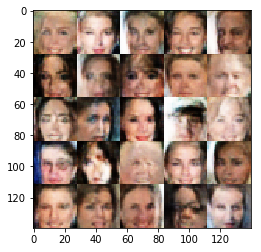

Epoch 1/1... Batch 4110... Discriminator Loss: 0.9456... Generator Loss: 1.0768
Epoch 1/1... Batch 4120... Discriminator Loss: 0.7700... Generator Loss: 1.7628
Epoch 1/1... Batch 4130... Discriminator Loss: 1.8494... Generator Loss: 0.2084
Epoch 1/1... Batch 4140... Discriminator Loss: 0.9759... Generator Loss: 0.8483
Epoch 1/1... Batch 4150... Discriminator Loss: 0.8905... Generator Loss: 1.1321
Epoch 1/1... Batch 4160... Discriminator Loss: 1.5625... Generator Loss: 0.2733
Epoch 1/1... Batch 4170... Discriminator Loss: 1.0929... Generator Loss: 0.5840
Epoch 1/1... Batch 4180... Discriminator Loss: 1.0268... Generator Loss: 0.8199
Epoch 1/1... Batch 4190... Discriminator Loss: 1.1939... Generator Loss: 1.8531
Epoch 1/1... Batch 4200... Discriminator Loss: 1.4629... Generator Loss: 0.3723


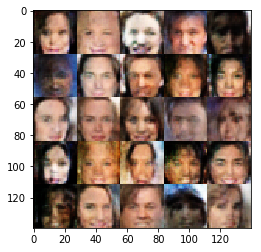

Epoch 1/1... Batch 4210... Discriminator Loss: 0.7230... Generator Loss: 1.5379
Epoch 1/1... Batch 4220... Discriminator Loss: 1.3628... Generator Loss: 0.4491
Epoch 1/1... Batch 4230... Discriminator Loss: 1.0318... Generator Loss: 1.3105
Epoch 1/1... Batch 4240... Discriminator Loss: 0.9516... Generator Loss: 0.7525
Epoch 1/1... Batch 4250... Discriminator Loss: 0.5343... Generator Loss: 1.4371
Epoch 1/1... Batch 4260... Discriminator Loss: 1.5675... Generator Loss: 0.3342
Epoch 1/1... Batch 4270... Discriminator Loss: 0.7564... Generator Loss: 1.2172
Epoch 1/1... Batch 4280... Discriminator Loss: 0.9533... Generator Loss: 1.4330
Epoch 1/1... Batch 4290... Discriminator Loss: 1.9105... Generator Loss: 0.1880
Epoch 1/1... Batch 4300... Discriminator Loss: 1.6397... Generator Loss: 0.2744


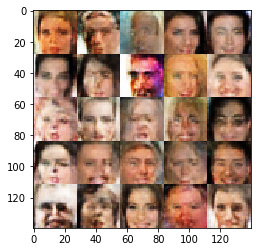

Epoch 1/1... Batch 4310... Discriminator Loss: 1.4995... Generator Loss: 0.3371
Epoch 1/1... Batch 4320... Discriminator Loss: 1.1093... Generator Loss: 0.6326
Epoch 1/1... Batch 4330... Discriminator Loss: 1.3600... Generator Loss: 0.3875
Epoch 1/1... Batch 4340... Discriminator Loss: 1.0219... Generator Loss: 0.7770
Epoch 1/1... Batch 4350... Discriminator Loss: 0.9954... Generator Loss: 1.9638
Epoch 1/1... Batch 4360... Discriminator Loss: 1.2369... Generator Loss: 0.6514
Epoch 1/1... Batch 4370... Discriminator Loss: 0.8748... Generator Loss: 1.3629
Epoch 1/1... Batch 4380... Discriminator Loss: 1.1401... Generator Loss: 0.7797
Epoch 1/1... Batch 4390... Discriminator Loss: 1.0988... Generator Loss: 0.7402
Epoch 1/1... Batch 4400... Discriminator Loss: 2.1184... Generator Loss: 0.1580


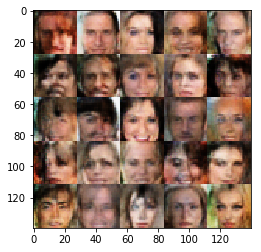

Epoch 1/1... Batch 4410... Discriminator Loss: 1.3216... Generator Loss: 0.3776
Epoch 1/1... Batch 4420... Discriminator Loss: 1.0210... Generator Loss: 0.8446
Epoch 1/1... Batch 4430... Discriminator Loss: 1.2031... Generator Loss: 0.4700
Epoch 1/1... Batch 4440... Discriminator Loss: 0.8763... Generator Loss: 0.8600
Epoch 1/1... Batch 4450... Discriminator Loss: 2.0973... Generator Loss: 0.1668
Epoch 1/1... Batch 4460... Discriminator Loss: 1.0568... Generator Loss: 0.8409
Epoch 1/1... Batch 4470... Discriminator Loss: 1.2285... Generator Loss: 0.4911
Epoch 1/1... Batch 4480... Discriminator Loss: 0.9575... Generator Loss: 1.1851
Epoch 1/1... Batch 4490... Discriminator Loss: 1.2727... Generator Loss: 0.4445
Epoch 1/1... Batch 4500... Discriminator Loss: 0.9089... Generator Loss: 0.8249


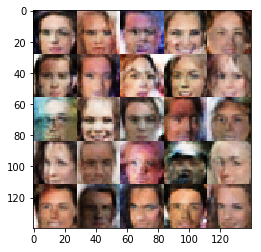

Epoch 1/1... Batch 4510... Discriminator Loss: 1.2784... Generator Loss: 0.3978
Epoch 1/1... Batch 4520... Discriminator Loss: 1.6045... Generator Loss: 0.2600
Epoch 1/1... Batch 4530... Discriminator Loss: 1.3561... Generator Loss: 0.3968
Epoch 1/1... Batch 4540... Discriminator Loss: 1.2190... Generator Loss: 0.4786
Epoch 1/1... Batch 4550... Discriminator Loss: 1.1277... Generator Loss: 1.7568
Epoch 1/1... Batch 4560... Discriminator Loss: 1.6380... Generator Loss: 0.2540
Epoch 1/1... Batch 4570... Discriminator Loss: 1.2726... Generator Loss: 0.4438
Epoch 1/1... Batch 4580... Discriminator Loss: 0.8343... Generator Loss: 1.0816
Epoch 1/1... Batch 4590... Discriminator Loss: 0.6958... Generator Loss: 1.9204
Epoch 1/1... Batch 4600... Discriminator Loss: 1.1184... Generator Loss: 0.4924


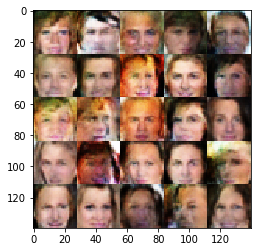

Epoch 1/1... Batch 4610... Discriminator Loss: 0.8984... Generator Loss: 1.2880
Epoch 1/1... Batch 4620... Discriminator Loss: 1.2785... Generator Loss: 0.4320
Epoch 1/1... Batch 4630... Discriminator Loss: 1.0969... Generator Loss: 0.5669
Epoch 1/1... Batch 4640... Discriminator Loss: 1.2640... Generator Loss: 0.4472
Epoch 1/1... Batch 4650... Discriminator Loss: 1.3216... Generator Loss: 0.3660
Epoch 1/1... Batch 4660... Discriminator Loss: 1.4165... Generator Loss: 0.3480
Epoch 1/1... Batch 4670... Discriminator Loss: 1.3621... Generator Loss: 0.3556
Epoch 1/1... Batch 4680... Discriminator Loss: 1.0837... Generator Loss: 0.8184
Epoch 1/1... Batch 4690... Discriminator Loss: 1.3934... Generator Loss: 0.3925
Epoch 1/1... Batch 4700... Discriminator Loss: 0.7024... Generator Loss: 0.9107


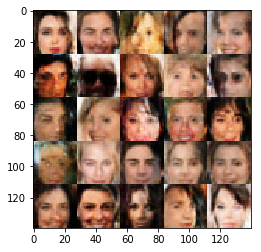

Epoch 1/1... Batch 4710... Discriminator Loss: 1.1581... Generator Loss: 0.5957
Epoch 1/1... Batch 4720... Discriminator Loss: 1.0957... Generator Loss: 1.0708
Epoch 1/1... Batch 4730... Discriminator Loss: 0.9206... Generator Loss: 1.2384
Epoch 1/1... Batch 4740... Discriminator Loss: 1.7302... Generator Loss: 0.2398
Epoch 1/1... Batch 4750... Discriminator Loss: 1.1404... Generator Loss: 0.7590
Epoch 1/1... Batch 4760... Discriminator Loss: 0.8085... Generator Loss: 1.3724
Epoch 1/1... Batch 4770... Discriminator Loss: 0.9989... Generator Loss: 0.7065
Epoch 1/1... Batch 4780... Discriminator Loss: 1.5715... Generator Loss: 0.2938
Epoch 1/1... Batch 4790... Discriminator Loss: 1.7449... Generator Loss: 0.2474
Epoch 1/1... Batch 4800... Discriminator Loss: 0.7119... Generator Loss: 0.9807


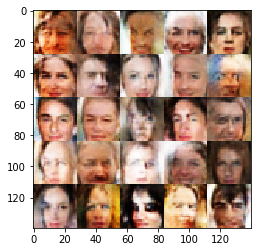

Epoch 1/1... Batch 4810... Discriminator Loss: 0.9849... Generator Loss: 0.9101
Epoch 1/1... Batch 4820... Discriminator Loss: 1.1995... Generator Loss: 0.4814
Epoch 1/1... Batch 4830... Discriminator Loss: 1.5349... Generator Loss: 0.3116
Epoch 1/1... Batch 4840... Discriminator Loss: 1.1173... Generator Loss: 1.7722
Epoch 1/1... Batch 4850... Discriminator Loss: 1.2475... Generator Loss: 0.4561
Epoch 1/1... Batch 4860... Discriminator Loss: 1.7886... Generator Loss: 0.2356
Epoch 1/1... Batch 4870... Discriminator Loss: 1.2716... Generator Loss: 0.4670
Epoch 1/1... Batch 4880... Discriminator Loss: 1.0754... Generator Loss: 0.5575
Epoch 1/1... Batch 4890... Discriminator Loss: 1.1944... Generator Loss: 0.4912
Epoch 1/1... Batch 4900... Discriminator Loss: 1.0723... Generator Loss: 1.0300


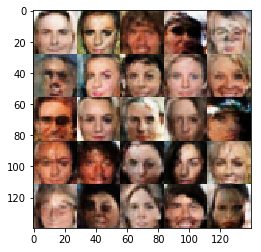

Epoch 1/1... Batch 4910... Discriminator Loss: 1.2530... Generator Loss: 0.5348
Epoch 1/1... Batch 4920... Discriminator Loss: 1.1724... Generator Loss: 0.8971
Epoch 1/1... Batch 4930... Discriminator Loss: 2.2320... Generator Loss: 0.1604
Epoch 1/1... Batch 4940... Discriminator Loss: 1.1323... Generator Loss: 0.8049
Epoch 1/1... Batch 4950... Discriminator Loss: 1.1220... Generator Loss: 2.0064
Epoch 1/1... Batch 4960... Discriminator Loss: 1.1948... Generator Loss: 0.6034
Epoch 1/1... Batch 4970... Discriminator Loss: 0.9200... Generator Loss: 1.3414
Epoch 1/1... Batch 4980... Discriminator Loss: 1.1766... Generator Loss: 0.5866
Epoch 1/1... Batch 4990... Discriminator Loss: 1.3880... Generator Loss: 0.5383
Epoch 1/1... Batch 5000... Discriminator Loss: 0.9784... Generator Loss: 0.7640


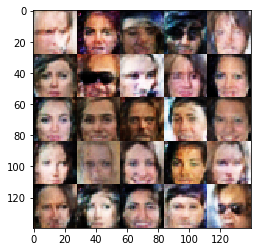

Epoch 1/1... Batch 5010... Discriminator Loss: 0.7414... Generator Loss: 1.0945
Epoch 1/1... Batch 5020... Discriminator Loss: 1.4326... Generator Loss: 0.6031
Epoch 1/1... Batch 5030... Discriminator Loss: 1.4465... Generator Loss: 0.3301
Epoch 1/1... Batch 5040... Discriminator Loss: 0.7720... Generator Loss: 1.4494
Epoch 1/1... Batch 5050... Discriminator Loss: 1.1364... Generator Loss: 0.5039
Epoch 1/1... Batch 5060... Discriminator Loss: 1.0431... Generator Loss: 0.5755
Epoch 1/1... Batch 5070... Discriminator Loss: 1.4146... Generator Loss: 0.4049
Epoch 1/1... Batch 5080... Discriminator Loss: 0.9472... Generator Loss: 0.7926
Epoch 1/1... Batch 5090... Discriminator Loss: 1.0679... Generator Loss: 0.9892
Epoch 1/1... Batch 5100... Discriminator Loss: 1.0945... Generator Loss: 1.4648


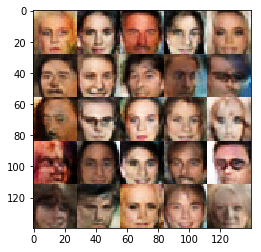

Epoch 1/1... Batch 5110... Discriminator Loss: 2.2374... Generator Loss: 0.1853
Epoch 1/1... Batch 5120... Discriminator Loss: 1.7275... Generator Loss: 0.2862
Epoch 1/1... Batch 5130... Discriminator Loss: 1.1531... Generator Loss: 1.0330
Epoch 1/1... Batch 5140... Discriminator Loss: 1.8964... Generator Loss: 0.2312
Epoch 1/1... Batch 5150... Discriminator Loss: 1.1670... Generator Loss: 0.9935
Epoch 1/1... Batch 5160... Discriminator Loss: 0.6526... Generator Loss: 1.3072
Epoch 1/1... Batch 5170... Discriminator Loss: 0.8818... Generator Loss: 1.2143
Epoch 1/1... Batch 5180... Discriminator Loss: 0.9810... Generator Loss: 1.1932
Epoch 1/1... Batch 5190... Discriminator Loss: 0.9030... Generator Loss: 1.0505
Epoch 1/1... Batch 5200... Discriminator Loss: 1.4972... Generator Loss: 0.2899


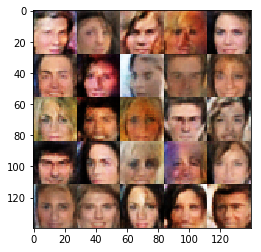

Epoch 1/1... Batch 5210... Discriminator Loss: 1.6234... Generator Loss: 0.2782
Epoch 1/1... Batch 5220... Discriminator Loss: 1.4068... Generator Loss: 0.3806
Epoch 1/1... Batch 5230... Discriminator Loss: 2.3266... Generator Loss: 0.1303
Epoch 1/1... Batch 5240... Discriminator Loss: 1.0675... Generator Loss: 0.6927
Epoch 1/1... Batch 5250... Discriminator Loss: 0.8071... Generator Loss: 1.0730
Epoch 1/1... Batch 5260... Discriminator Loss: 1.9242... Generator Loss: 0.2056
Epoch 1/1... Batch 5270... Discriminator Loss: 0.8841... Generator Loss: 0.9619
Epoch 1/1... Batch 5280... Discriminator Loss: 0.8717... Generator Loss: 0.9303
Epoch 1/1... Batch 5290... Discriminator Loss: 1.0641... Generator Loss: 0.9684
Epoch 1/1... Batch 5300... Discriminator Loss: 0.9562... Generator Loss: 0.7283


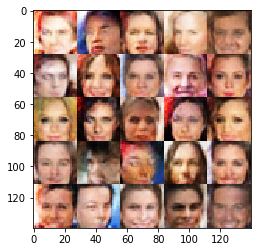

Epoch 1/1... Batch 5310... Discriminator Loss: 0.8654... Generator Loss: 0.9926
Epoch 1/1... Batch 5320... Discriminator Loss: 0.9072... Generator Loss: 1.8469
Epoch 1/1... Batch 5330... Discriminator Loss: 1.6098... Generator Loss: 0.2777
Epoch 1/1... Batch 5340... Discriminator Loss: 1.6393... Generator Loss: 0.2843
Epoch 1/1... Batch 5350... Discriminator Loss: 1.6781... Generator Loss: 0.2736
Epoch 1/1... Batch 5360... Discriminator Loss: 1.2704... Generator Loss: 0.4411
Epoch 1/1... Batch 5370... Discriminator Loss: 0.8559... Generator Loss: 1.2739
Epoch 1/1... Batch 5380... Discriminator Loss: 1.3565... Generator Loss: 0.4559
Epoch 1/1... Batch 5390... Discriminator Loss: 0.8494... Generator Loss: 1.7090
Epoch 1/1... Batch 5400... Discriminator Loss: 0.8168... Generator Loss: 0.9921


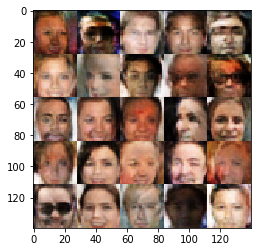

Epoch 1/1... Batch 5410... Discriminator Loss: 0.9758... Generator Loss: 0.8913
Epoch 1/1... Batch 5420... Discriminator Loss: 1.0611... Generator Loss: 0.5318
Epoch 1/1... Batch 5430... Discriminator Loss: 1.4775... Generator Loss: 0.3215
Epoch 1/1... Batch 5440... Discriminator Loss: 1.8167... Generator Loss: 0.2386
Epoch 1/1... Batch 5450... Discriminator Loss: 1.1530... Generator Loss: 0.5573
Epoch 1/1... Batch 5460... Discriminator Loss: 1.3037... Generator Loss: 0.6164
Epoch 1/1... Batch 5470... Discriminator Loss: 1.7729... Generator Loss: 1.9592
Epoch 1/1... Batch 5480... Discriminator Loss: 1.7233... Generator Loss: 0.2735
Epoch 1/1... Batch 5490... Discriminator Loss: 0.8807... Generator Loss: 2.1572
Epoch 1/1... Batch 5500... Discriminator Loss: 1.3282... Generator Loss: 2.0101


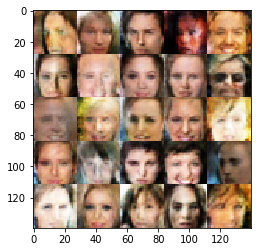

Epoch 1/1... Batch 5510... Discriminator Loss: 1.2439... Generator Loss: 0.4687
Epoch 1/1... Batch 5520... Discriminator Loss: 1.6234... Generator Loss: 0.3342
Epoch 1/1... Batch 5530... Discriminator Loss: 1.6322... Generator Loss: 0.2680
Epoch 1/1... Batch 5540... Discriminator Loss: 1.1542... Generator Loss: 0.7493
Epoch 1/1... Batch 5550... Discriminator Loss: 1.4758... Generator Loss: 0.3430
Epoch 1/1... Batch 5560... Discriminator Loss: 1.2811... Generator Loss: 0.4749
Epoch 1/1... Batch 5570... Discriminator Loss: 0.9575... Generator Loss: 0.6197
Epoch 1/1... Batch 5580... Discriminator Loss: 1.0646... Generator Loss: 0.9226
Epoch 1/1... Batch 5590... Discriminator Loss: 0.7719... Generator Loss: 0.9123
Epoch 1/1... Batch 5600... Discriminator Loss: 1.0200... Generator Loss: 0.5772


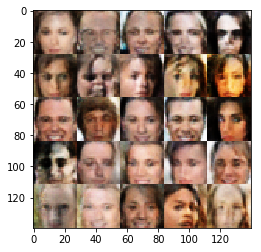

Epoch 1/1... Batch 5610... Discriminator Loss: 1.8740... Generator Loss: 0.2040
Epoch 1/1... Batch 5620... Discriminator Loss: 1.4627... Generator Loss: 0.3580
Epoch 1/1... Batch 5630... Discriminator Loss: 1.4310... Generator Loss: 1.9678
Epoch 1/1... Batch 5640... Discriminator Loss: 1.0796... Generator Loss: 0.6172
Epoch 1/1... Batch 5650... Discriminator Loss: 0.7917... Generator Loss: 0.8555
Epoch 1/1... Batch 5660... Discriminator Loss: 1.3862... Generator Loss: 0.3606
Epoch 1/1... Batch 5670... Discriminator Loss: 1.0096... Generator Loss: 2.1855
Epoch 1/1... Batch 5680... Discriminator Loss: 1.0422... Generator Loss: 1.0493
Epoch 1/1... Batch 5690... Discriminator Loss: 1.1959... Generator Loss: 0.5045
Epoch 1/1... Batch 5700... Discriminator Loss: 0.8911... Generator Loss: 0.6797


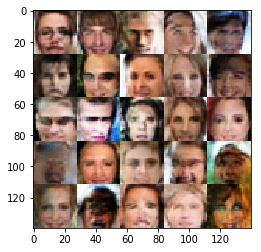

Epoch 1/1... Batch 5710... Discriminator Loss: 1.3125... Generator Loss: 0.3886
Epoch 1/1... Batch 5720... Discriminator Loss: 0.8622... Generator Loss: 0.8218
Epoch 1/1... Batch 5730... Discriminator Loss: 1.5839... Generator Loss: 0.2686
Epoch 1/1... Batch 5740... Discriminator Loss: 2.2482... Generator Loss: 0.1427
Epoch 1/1... Batch 5750... Discriminator Loss: 1.2703... Generator Loss: 0.5673
Epoch 1/1... Batch 5760... Discriminator Loss: 0.8816... Generator Loss: 1.0579
Epoch 1/1... Batch 5770... Discriminator Loss: 1.1173... Generator Loss: 1.3676
Epoch 1/1... Batch 5780... Discriminator Loss: 0.8710... Generator Loss: 1.4275
Epoch 1/1... Batch 5790... Discriminator Loss: 1.0220... Generator Loss: 0.6540
Epoch 1/1... Batch 5800... Discriminator Loss: 1.2979... Generator Loss: 0.4666


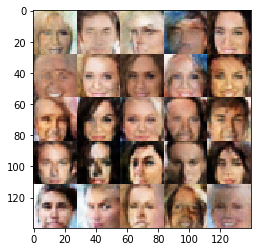

Epoch 1/1... Batch 5810... Discriminator Loss: 0.8900... Generator Loss: 1.1129
Epoch 1/1... Batch 5820... Discriminator Loss: 1.0968... Generator Loss: 0.7440
Epoch 1/1... Batch 5830... Discriminator Loss: 2.1561... Generator Loss: 0.1520
Epoch 1/1... Batch 5840... Discriminator Loss: 1.2402... Generator Loss: 0.5451
Epoch 1/1... Batch 5850... Discriminator Loss: 1.1321... Generator Loss: 0.5620
Epoch 1/1... Batch 5860... Discriminator Loss: 1.2480... Generator Loss: 0.4396
Epoch 1/1... Batch 5870... Discriminator Loss: 1.1833... Generator Loss: 0.5103
Epoch 1/1... Batch 5880... Discriminator Loss: 1.4830... Generator Loss: 0.3293
Epoch 1/1... Batch 5890... Discriminator Loss: 0.9875... Generator Loss: 0.6928
Epoch 1/1... Batch 5900... Discriminator Loss: 1.3094... Generator Loss: 0.3869


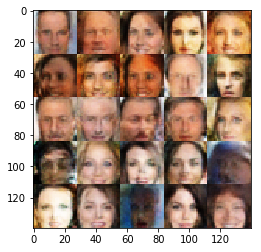

Epoch 1/1... Batch 5910... Discriminator Loss: 1.2444... Generator Loss: 0.4820
Epoch 1/1... Batch 5920... Discriminator Loss: 0.7028... Generator Loss: 0.9929
Epoch 1/1... Batch 5930... Discriminator Loss: 0.8915... Generator Loss: 0.6938
Epoch 1/1... Batch 5940... Discriminator Loss: 1.6261... Generator Loss: 0.2618
Epoch 1/1... Batch 5950... Discriminator Loss: 0.8757... Generator Loss: 1.0411
Epoch 1/1... Batch 5960... Discriminator Loss: 1.6693... Generator Loss: 0.2550
Epoch 1/1... Batch 5970... Discriminator Loss: 1.7106... Generator Loss: 0.2487
Epoch 1/1... Batch 5980... Discriminator Loss: 1.2850... Generator Loss: 0.4918
Epoch 1/1... Batch 5990... Discriminator Loss: 1.2194... Generator Loss: 0.4798
Epoch 1/1... Batch 6000... Discriminator Loss: 1.3851... Generator Loss: 0.3683


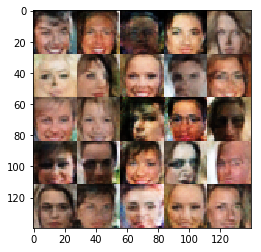

Epoch 1/1... Batch 6010... Discriminator Loss: 1.1506... Generator Loss: 1.2183
Epoch 1/1... Batch 6020... Discriminator Loss: 1.1124... Generator Loss: 0.6335
Epoch 1/1... Batch 6030... Discriminator Loss: 1.3286... Generator Loss: 0.4439
Epoch 1/1... Batch 6040... Discriminator Loss: 1.3836... Generator Loss: 0.3506
Epoch 1/1... Batch 6050... Discriminator Loss: 1.0484... Generator Loss: 0.9458
Epoch 1/1... Batch 6060... Discriminator Loss: 1.4217... Generator Loss: 0.3460
Epoch 1/1... Batch 6070... Discriminator Loss: 2.0362... Generator Loss: 0.1754
Epoch 1/1... Batch 6080... Discriminator Loss: 1.3422... Generator Loss: 0.5079
Epoch 1/1... Batch 6090... Discriminator Loss: 2.0611... Generator Loss: 0.1621
Epoch 1/1... Batch 6100... Discriminator Loss: 1.6534... Generator Loss: 0.2700


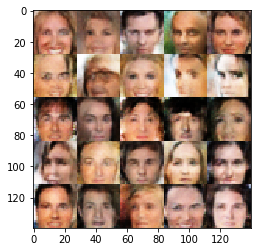

Epoch 1/1... Batch 6110... Discriminator Loss: 1.4258... Generator Loss: 0.3686
Epoch 1/1... Batch 6120... Discriminator Loss: 1.2966... Generator Loss: 0.5969
Epoch 1/1... Batch 6130... Discriminator Loss: 1.2398... Generator Loss: 1.9787
Epoch 1/1... Batch 6140... Discriminator Loss: 1.6438... Generator Loss: 0.2700
Epoch 1/1... Batch 6150... Discriminator Loss: 1.2389... Generator Loss: 0.4467
Epoch 1/1... Batch 6160... Discriminator Loss: 0.8249... Generator Loss: 0.8902
Epoch 1/1... Batch 6170... Discriminator Loss: 1.5210... Generator Loss: 0.3018
Epoch 1/1... Batch 6180... Discriminator Loss: 1.2567... Generator Loss: 0.4438
Epoch 1/1... Batch 6190... Discriminator Loss: 0.9440... Generator Loss: 0.7487
Epoch 1/1... Batch 6200... Discriminator Loss: 1.0139... Generator Loss: 0.8238


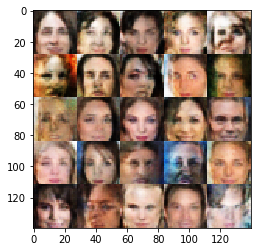

Epoch 1/1... Batch 6210... Discriminator Loss: 1.8339... Generator Loss: 0.2480
Epoch 1/1... Batch 6220... Discriminator Loss: 1.1716... Generator Loss: 0.5570
Epoch 1/1... Batch 6230... Discriminator Loss: 1.5310... Generator Loss: 0.2914
Epoch 1/1... Batch 6240... Discriminator Loss: 0.8198... Generator Loss: 1.3734
Epoch 1/1... Batch 6250... Discriminator Loss: 2.0901... Generator Loss: 0.1874
Epoch 1/1... Batch 6260... Discriminator Loss: 1.4915... Generator Loss: 0.3159
Epoch 1/1... Batch 6270... Discriminator Loss: 1.1932... Generator Loss: 0.4305
Epoch 1/1... Batch 6280... Discriminator Loss: 0.9144... Generator Loss: 0.6410
Epoch 1/1... Batch 6290... Discriminator Loss: 1.6509... Generator Loss: 0.2610
Epoch 1/1... Batch 6300... Discriminator Loss: 1.2714... Generator Loss: 0.8549


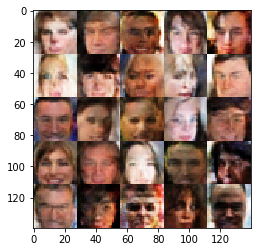

Epoch 1/1... Batch 6310... Discriminator Loss: 0.8675... Generator Loss: 0.7639
Epoch 1/1... Batch 6320... Discriminator Loss: 1.3498... Generator Loss: 0.3860
Epoch 1/1... Batch 6330... Discriminator Loss: 1.1915... Generator Loss: 0.5185


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.